# PROJECT TEAM ID: 05-EFEB-24-CDS-BUN-021-WDM09  |PROJECT CODE : PM-PR-0012-ABC Tech  |PROJECT NAME : ABC Tech | Category: ITSM - ML  

# Bussiness Case


# Introduction:
ABC Tech, a well-established mid-size organization operating in the IT-enabled business segment for over a decade, has successfully implemented ITIL (Information Technology Infrastructure Library) practices, including incident management, problem management, change management, and configuration management. However, recent challenges have arisen, primarily focusing on the need for improvement in incident management processes.

# Current Scenario:

ABC Tech manages approximately 22,000 to 25,000 IT incidents annually, adhering to ITIL best practices. Despite a mature process framework, a recent audit suggests that further improvements may not provide a significant return on investment. Additionally, customer surveys have reflected dissatisfaction with the current incident management approach.


# Exploring Machine Learning as a Solution:

Inspired by insights from a conference on Machine Learning for IT Service Management (ITSM), ABC Tech's management is contemplating the integration of machine learning to enhance their incident management processes. Implementing machine learning can lead to improved efficiency, enhanced user experience, reduced Mean Time to Resolution (MTTR), proactive issue prevention, and cost savings.

​

# Domain analysis :-   


CI_Name (Configuration Item Name):This refers to the specific item involved in the incident, such as a system or software component. Identifying the exact CI is crucial for diagnosing the root cause and expediting resolution.

CI_Cat (Configuration Item Category):This denotes the broader category of the CI, like applications or infrastructure. For example, 'subapplication' indicates that a subcomponent of a larger application is affected, which can influence overall functionality.

CI_Subcat (Configuration Item Subcategory):Provides more detailed information about the CI. For instance, 'Web-Based Application' specifies that the affected item is a web application, highlighting certain complexities in its management.

WBS (Work Breakdown Structure):WBS000162 serves as an internal identifier for tasks or processes related to the incident. These codes are essential for organizing and tracking work efficiently.

Incident_ID:IM0000004 is a unique identifier assigned to the incident within the system. While the ID remains constant, the context and details of each incident can vary significantly.

Status:Indicates the current state of the incident, such as Open, In Progress, Resolved, or Closed. It's important to monitor and reassess the status regularly to ensure timely responses and effective communication.

Impact & Urgency:Impact refers to the effect of the incident on business processes, while urgency indicates how quickly the incident needs resolution. Both factors are used to determine the priority of the incident.

Priority:A calculated field derived from impact and urgency, indicating the order in which the incident should be addressed. Higher priority suggests a more critical need for prompt resolution.

Category:Defines the process involved, such as 'Transform,' which refers to altering or modifying something. Understanding the category helps in applying appropriate methods and techniques for resolution.

KB_number (Knowledge Base Number):KM0000553 refers to a related knowledge base article that may contain solutions or workarounds pertinent to the incident. Reviewing such articles can provide valuable insights for resolution.

Alert_Status:Represents the current status of all alerts related to the incident. Unresolved alerts require prompt attention to mitigate potential risks and ensure system stability.

No_of_Reassignments:Indicates how many times the incident was reassigned to different teams. A high number of reassignments, such as 26 times, may point to inefficiencies or communication issues in incident management.

Open_Time, Resolved_Time, Close_Time:These timestamps track the incident's lifecycle from creation to closure. Significant delays between these times can suggest underlying issues in the resolution process.

Handle_Time_hrs:Represents the total time taken to manage and resolve the incident. High values, like 3871.69 hours, may indicate inefficiencies or complexities in the process that need addressing.

Closure_Code:Specifies how the incident was concluded, such as Resolved, Canceled, or Other. Accurate closure codes are vital for record-keeping and future incident handling strategies.

No_of_Related_Interactions:Denotes the number of interactions related to the incident, including communications like emails and calls. Understanding these interactions provides insight into the incident's complexity and stakeholder involvement.

No_of_Related_Incidents:Indicates other occurrences linked to the same underlying cause. Recognizing related incidents helps in identifying patterns and preventing future occurrences.

No_of_Related_Changes:Refers to the number of modifications implemented to address the issue. Tracking these changes is essential for assessing the effectiveness of the solutions applied.

Related_Interaction:SD0000007 represents the ID of a related interaction or ticket, serving as a crucial reference point for tracking and understanding the incident's history.

Related_Change:C00000056 is the identification number assigned to a change request related to the incident. This ID encapsulates information pivotal for comprehending the context and actions taken during incident management.

Understanding these elements is essential for effective incident management, as they provide a structured approach to identifying, categorizing, and resolving incidents within an organization.




# Goal: Predict priority levels (1 & 2) to take preventive measures.
Model: Classification (e.g., Logistic Regression, Random Forest, XGBoost).
Input: Incident features (Impact, Urgency, Reassignments, etc.).
Output: Priority level prediction.



In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [6]:
pd.set_option("display.max_columns",None)


In [8]:
df = pd.read_csv("Mysql project ITSM.csv",on_bad_lines="skip")

In [9]:
df

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3.0,0.415050,incident,KM0000611,closed,33.0,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1.0,SD0000011,1.0,NaN,NaN
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NaN,0.517551,request for information,KM0000339,closed,3.0,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1.0,SD0000017,NaN,NaN,NaN
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4.0,0.642927,incident,KM0000611,closed,13.0,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1.0,SD0000025,NaN,NaN,NaN
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4.0,0.345258,incident,KM0000611,closed,2.0,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1.0,SD0000029,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46506,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4.0,0.231896,incident,KM0001314,closed,0.0,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1.0,SD0147021,NaN,NaN,NaN
46507,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4.0,0.805153,incident,KM0002360,closed,0.0,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1.0,SD0146967,NaN,NaN,NaN
46508,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5.0,0.917466,incident,KM0000315,closed,0.0,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1.0,SD0146982,NaN,NaN,NaN
46509,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4.0,0.701278,incident,KM0001287,closed,0.0,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1.0,SD0146986,NaN,NaN,NaN


In [10]:
df.Urgency.value_counts()

4               15540
5               12270
4                7011
5                4465
3                4419
3                2105
2                 538
2                 156
1                   5
1                   1
5 - Very Low        1
Name: Urgency, dtype: int64

## basic info

In [461]:
df.head(1)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,Category,KB_number,Alert_Status,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4.0,0.601292,incident,KM0000553,closed,26.0,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1.0,SD0000007,2.0,NaN,NaN


In [462]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Name                     46511 non-null  object 
 1   CI_Cat                      46400 non-null  object 
 2   CI_Subcat                   46400 non-null  object 
 3   WBS                         46511 non-null  object 
 4   Incident_ID                 46511 non-null  object 
 5   Status                      46511 non-null  object 
 6   Impact                      46511 non-null  object 
 7   Urgency                     46511 non-null  object 
 8   Priority                    45132 non-null  float64
 9   number_cnt                  46511 non-null  float64
 10  Category                    46511 non-null  object 
 11  KB_number                   46511 non-null  object 
 12  Alert_Status                46511 non-null  object 
 13  No_of_Reassignments         465

In [463]:
df.describe()

,Priority,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
count,45132.000000,46511.000000,46510.000000,46401.000000,1221.000000,559.000000
mean,4.215634,0.499683,1.131821,1.149846,1.669943,1.059034
std,0.705506,0.288585,2.268875,2.558232,3.341000,0.403950
min,1.000000,0.000023,0.000000,1.000000,1.000000,1.000000
25%,4.000000,0.248496,0.000000,1.000000,1.000000,1.000000
50%,4.000000,0.500302,0.000000,1.000000,1.000000,1.000000
75%,5.000000,0.749090,2.000000,1.000000,1.000000,1.000000
max,5.000000,0.999997,46.000000,370.000000,63.000000,9.000000


In [464]:
df.describe(include="O")

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Category,KB_number,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46511,46400,46400,46511,46511,46511,46511,46511,46511,46511,46511,46511,2280,44735,46511,46510,46051,46511,559
unique,3013,12,64,274,46511,2,6,11,4,1825,1,34588,2240,33575,34471,30586,14,42974,232
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,incident,KM0001106,closed,24-03-2014 08:54,25-02-2014 15:27,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,3048,32830,18769,13318,1,46502,22520,15540,37678,1102,46511,7,2,7,21,236,16436,3429,110


In [465]:
df.Priority.unique()

array([ 4.,  3., nan,  5.,  2.,  1.])

In [466]:
df.Priority.dtypes

dtype('float64')

In [467]:
df.Related_Interaction.unique()

array(['SD0000007', 'SD0000011', 'SD0000017', ..., 'SD0146982',
       'SD0146986', 'SD0147088'], dtype=object)

In [468]:
df.KB_number.value_counts()

KM0001106    1102
KM0000940     863
KM0001444     788
KM0002043     773
KM0001825     725
             ... 
KM0001885       1
KM0000552       1
KM0001601       1
KM0001629       1
KM0001578       1
Name: KB_number, Length: 1825, dtype: int64

In [469]:
df.Related_Interaction.value_counts()

#MULTIVALUE    3429
#N/B            110
SD0000007         1
SD0095595         1
SD0095597         1
               ... 
SD0045746         1
SD0045745         1
SD0046120         1
SD0046121         1
SD0147088         1
Name: Related_Interaction, Length: 42974, dtype: int64

## Dropping unwanted column (CI_Name,Incident_ID,KB_number)

In [470]:
df.drop(columns=["CI_Name","Incident_ID","KB_number"],inplace = True)

In [471]:
df.describe(include="O")

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Category,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46400,46400,46511,46511,46511,46511,46511,46511,46511,2280,44735,46511,46510,46051,46511,559
unique,12,64,274,2,6,11,4,1,34588,2240,33575,34471,30586,14,42974,232
top,application,Server Based Application,WBS000073,Closed,4,4,incident,closed,24-03-2014 08:54,25-02-2014 15:27,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,32830,18769,13318,46502,22520,15540,37678,46511,7,2,7,21,236,16436,3429,110


## Univariate Analysis

In [472]:
df.describe(include="O")

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Category,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
count,46400,46400,46511,46511,46511,46511,46511,46511,46511,2280,44735,46511,46510,46051,46511,559
unique,12,64,274,2,6,11,4,1,34588,2240,33575,34471,30586,14,42974,232
top,application,Server Based Application,WBS000073,Closed,4,4,incident,closed,24-03-2014 08:54,25-02-2014 15:27,10-10-2013 12:53,02-10-2013 15:20,0,Other,#MULTIVALUE,C00003013
freq,32830,18769,13318,46502,22520,15540,37678,46511,7,2,7,21,236,16436,3429,110


In [473]:
unique_values = df.nunique()
print(unique_values)


CI_Cat                           12
CI_Subcat                        64
WBS                             274
Status                            2
Impact                            6
Urgency                          11
Priority                          5
number_cnt                    46511
Category                          4
Alert_Status                      1
No_of_Reassignments              41
Open_Time                     34588
Reopen_Time                    2240
Resolved_Time                 33575
Close_Time                    34471
Handle_Time_hrs               30586
Closure_Code                     14
No_of_Related_Interactions       49
Related_Interaction           42974
No_of_Related_Incidents          24
No_of_Related_Changes             4
Related_Change                  232
dtype: int64


In [474]:
df.number_cnt.value_counts()

0.601292    1
0.185393    1
0.050600    1
0.283917    1
0.606614    1
           ..
0.742779    1
0.292990    1
0.131575    1
0.828914    1
0.902320    1
Name: number_cnt, Length: 46511, dtype: int64

In [475]:
df1 = df[["number_cnt","No_of_Reassignments","No_of_Related_Interactions","No_of_Related_Incidents","No_of_Related_Changes"]]
df1

,number_cnt,No_of_Reassignments,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,0.601292,26.0,1.0,2.0,NaN
1,0.415050,33.0,1.0,1.0,NaN
2,0.517551,3.0,1.0,NaN,NaN
3,0.642927,13.0,1.0,NaN,NaN
4,0.345258,2.0,1.0,NaN,NaN
...,...,...,...,...,...
46506,0.231896,0.0,1.0,NaN,NaN
46507,0.805153,0.0,1.0,NaN,NaN
46508,0.917466,0.0,1.0,NaN,NaN
46509,0.701278,0.0,1.0,NaN,NaN


In [476]:
df2 = df[["CI_Cat","CI_Subcat","WBS","Status","Impact","Urgency","Category","Alert_Status","Open_Time","Reopen_Time","Resolved_Time","Close_Time","Handle_Time_hrs","Closure_Code","Related_Interaction","Related_Change"]]

In [477]:
df2

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Category,Alert_Status,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,Related_Interaction,Related_Change
0,subapplication,Web Based Application,WBS000162,Closed,4,4,incident,closed,05-02-2012 13:32,NaN,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,SD0000007,NaN
1,application,Web Based Application,WBS000088,Closed,3,3,incident,closed,12-03-2012 15:44,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,SD0000011,NaN
2,application,Desktop Application,WBS000092,Closed,NS,3,request for information,closed,29-03-2012 12:36,NaN,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,SD0000017,NaN
3,application,Web Based Application,WBS000088,Closed,4,4,incident,closed,17-07-2012 11:49,NaN,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,SD0000025,NaN
4,application,Web Based Application,WBS000088,Closed,4,4,incident,closed,10-08-2012 11:01,NaN,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,SD0000029,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46506,application,Server Based Application,WBS000073,Closed,4,4,incident,closed,31-03-2014 16:23,NaN,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,SD0147021,NaN
46507,application,Server Based Application,WBS000073,Closed,4,4,incident,closed,31-03-2014 15:03,NaN,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,SD0146967,NaN
46508,computer,Laptop,WBS000091,Closed,5,5,incident,closed,31-03-2014 15:28,NaN,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,SD0146982,NaN
46509,application,Web Based Application,WBS000073,Closed,4,4,incident,closed,31-03-2014 15:35,NaN,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,SD0146986,NaN


## Univariate Analysis

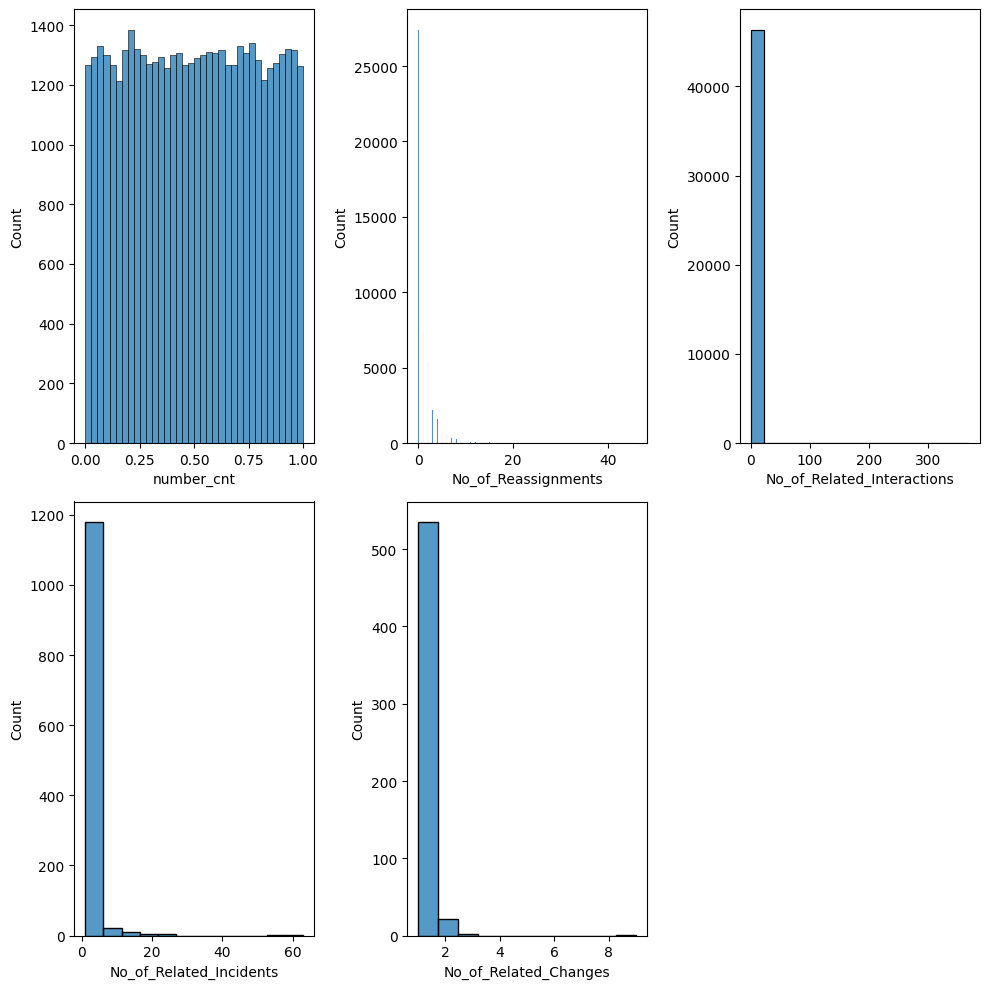

In [478]:
plt.figure(figsize=(10,10))
plotnumber = 1
for i in df1:
    plt.subplot(2,3,plotnumber)
    sns.histplot(df1[i])
    plotnumber += 1
plt.tight_layout()
    

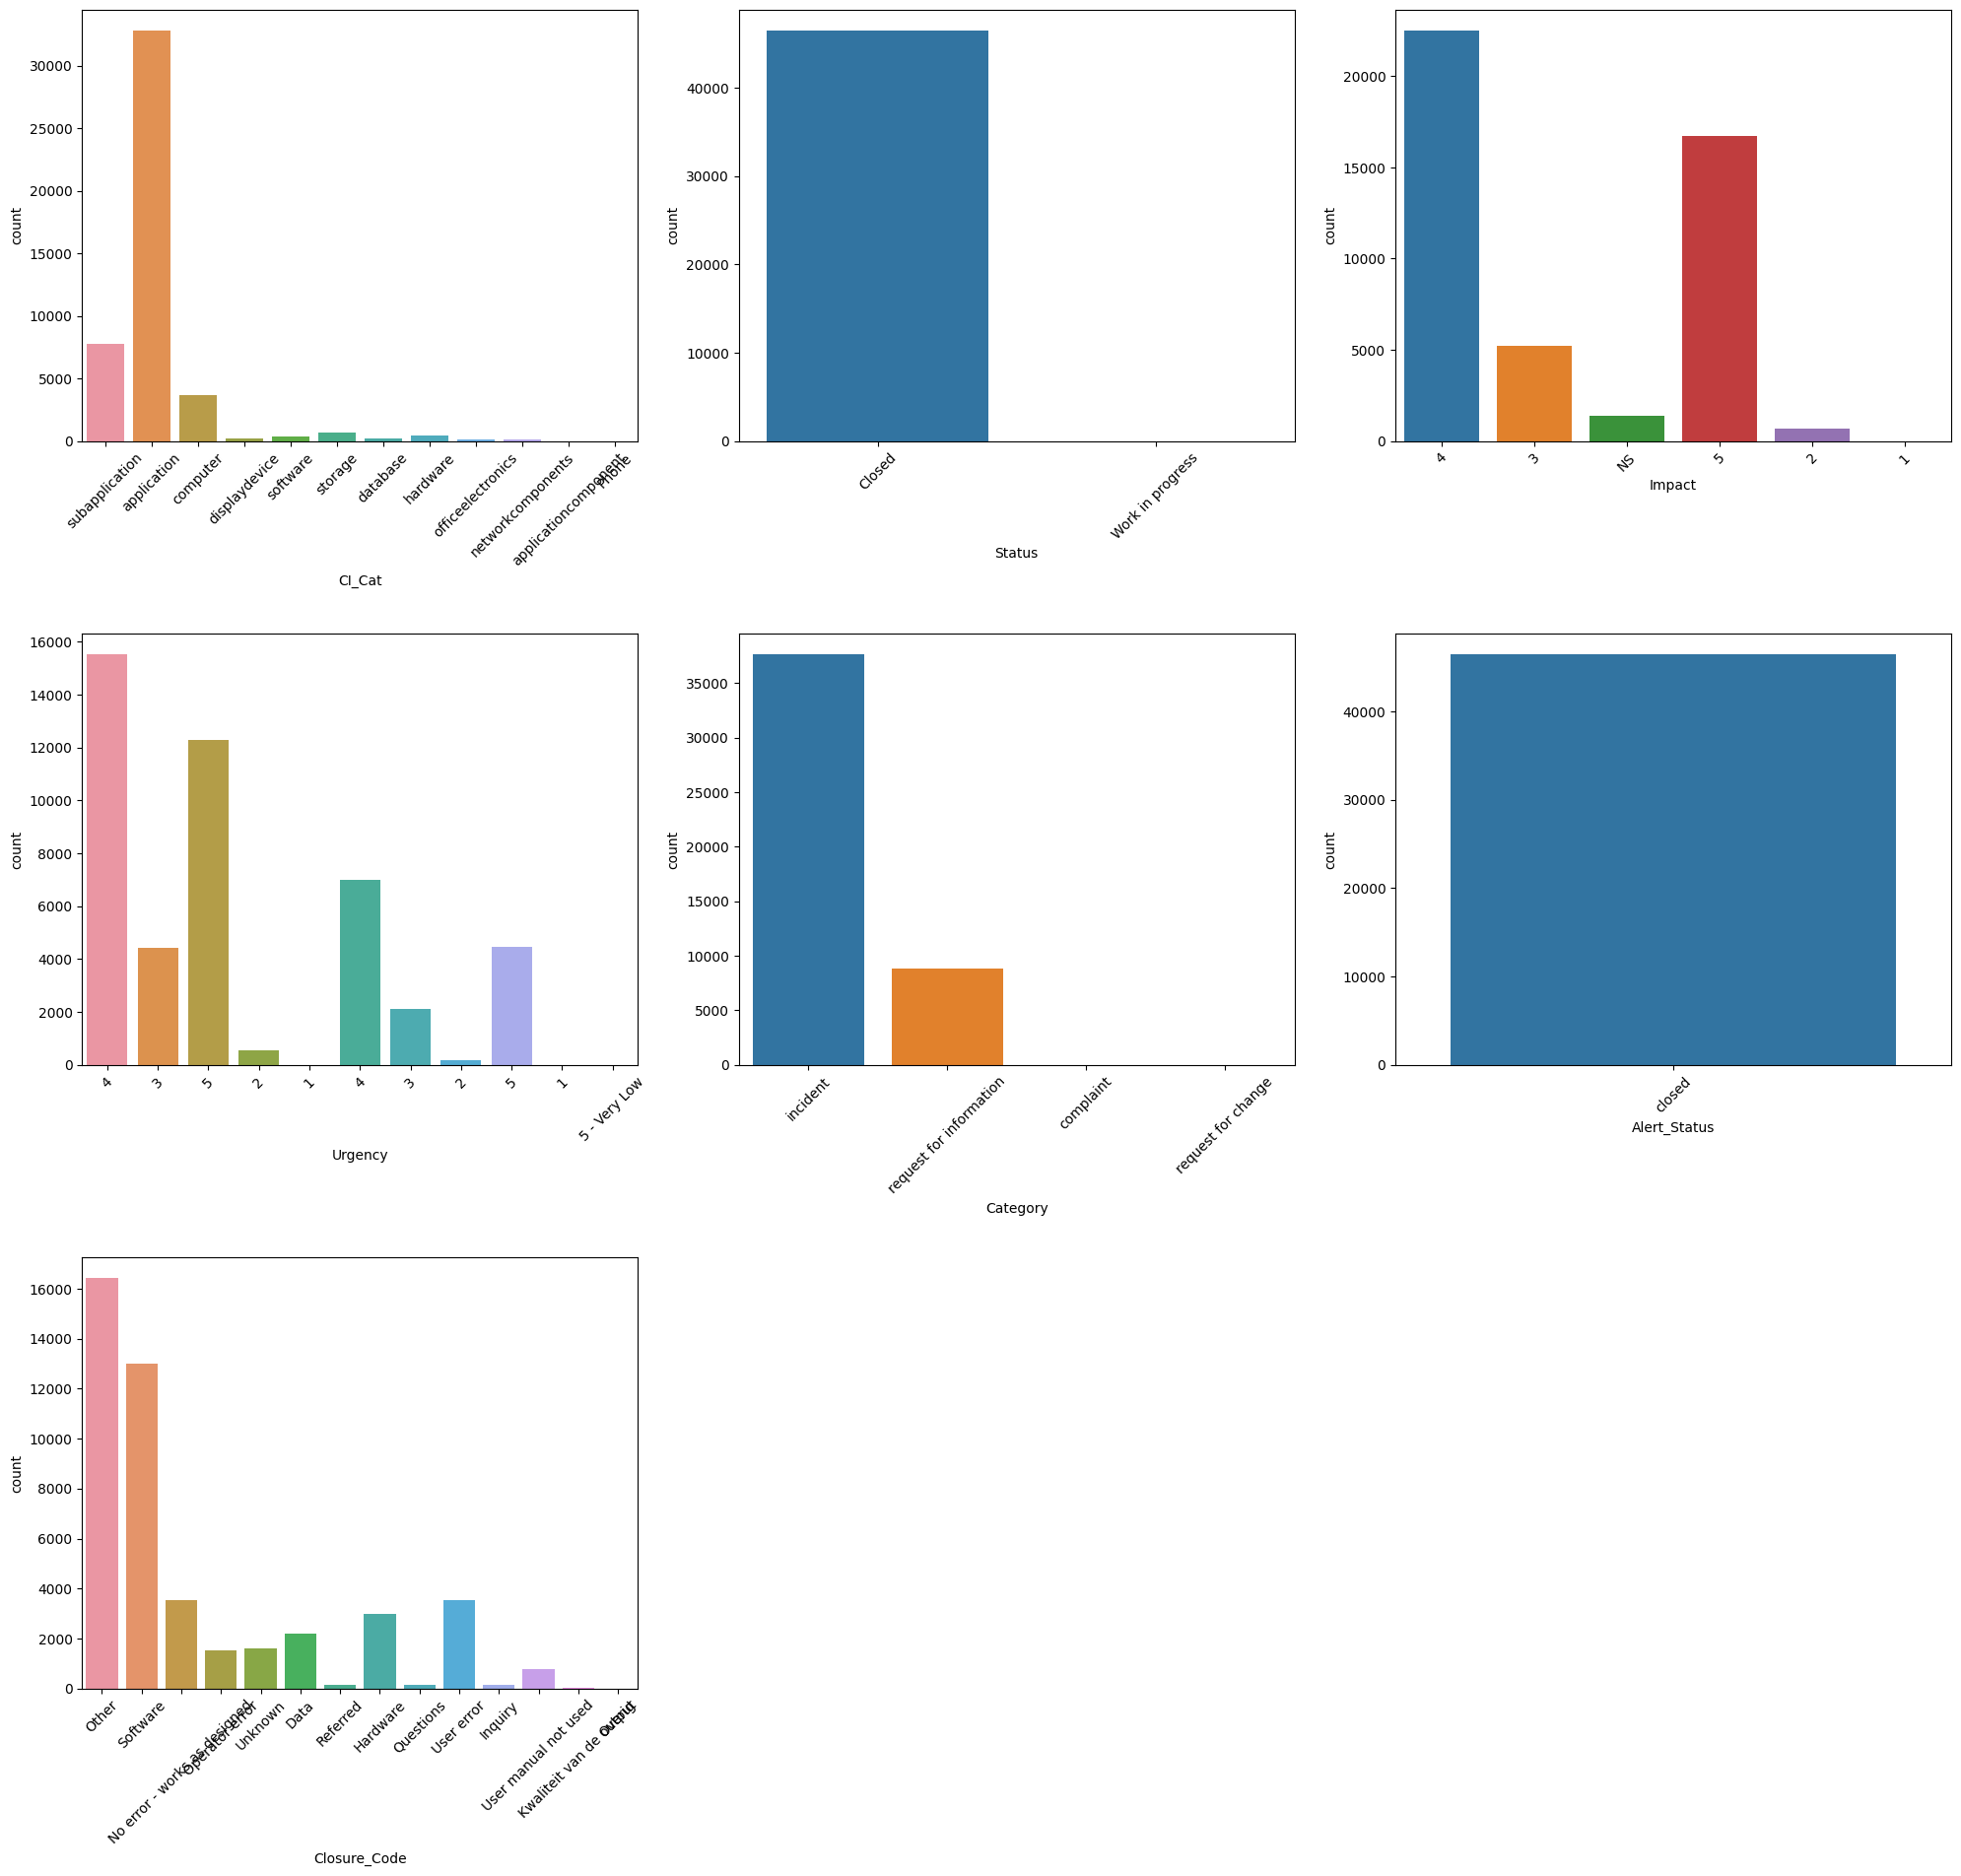

In [479]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df2:
    if len(df2[i].unique()) < 20:
        plt.subplot(5,3,plotnumber)
        plt.xticks(rotation = 45)
        sns.countplot(x = df2[i])
        plotnumber += 1

plt.tight_layout()

## Bivariate Analysis

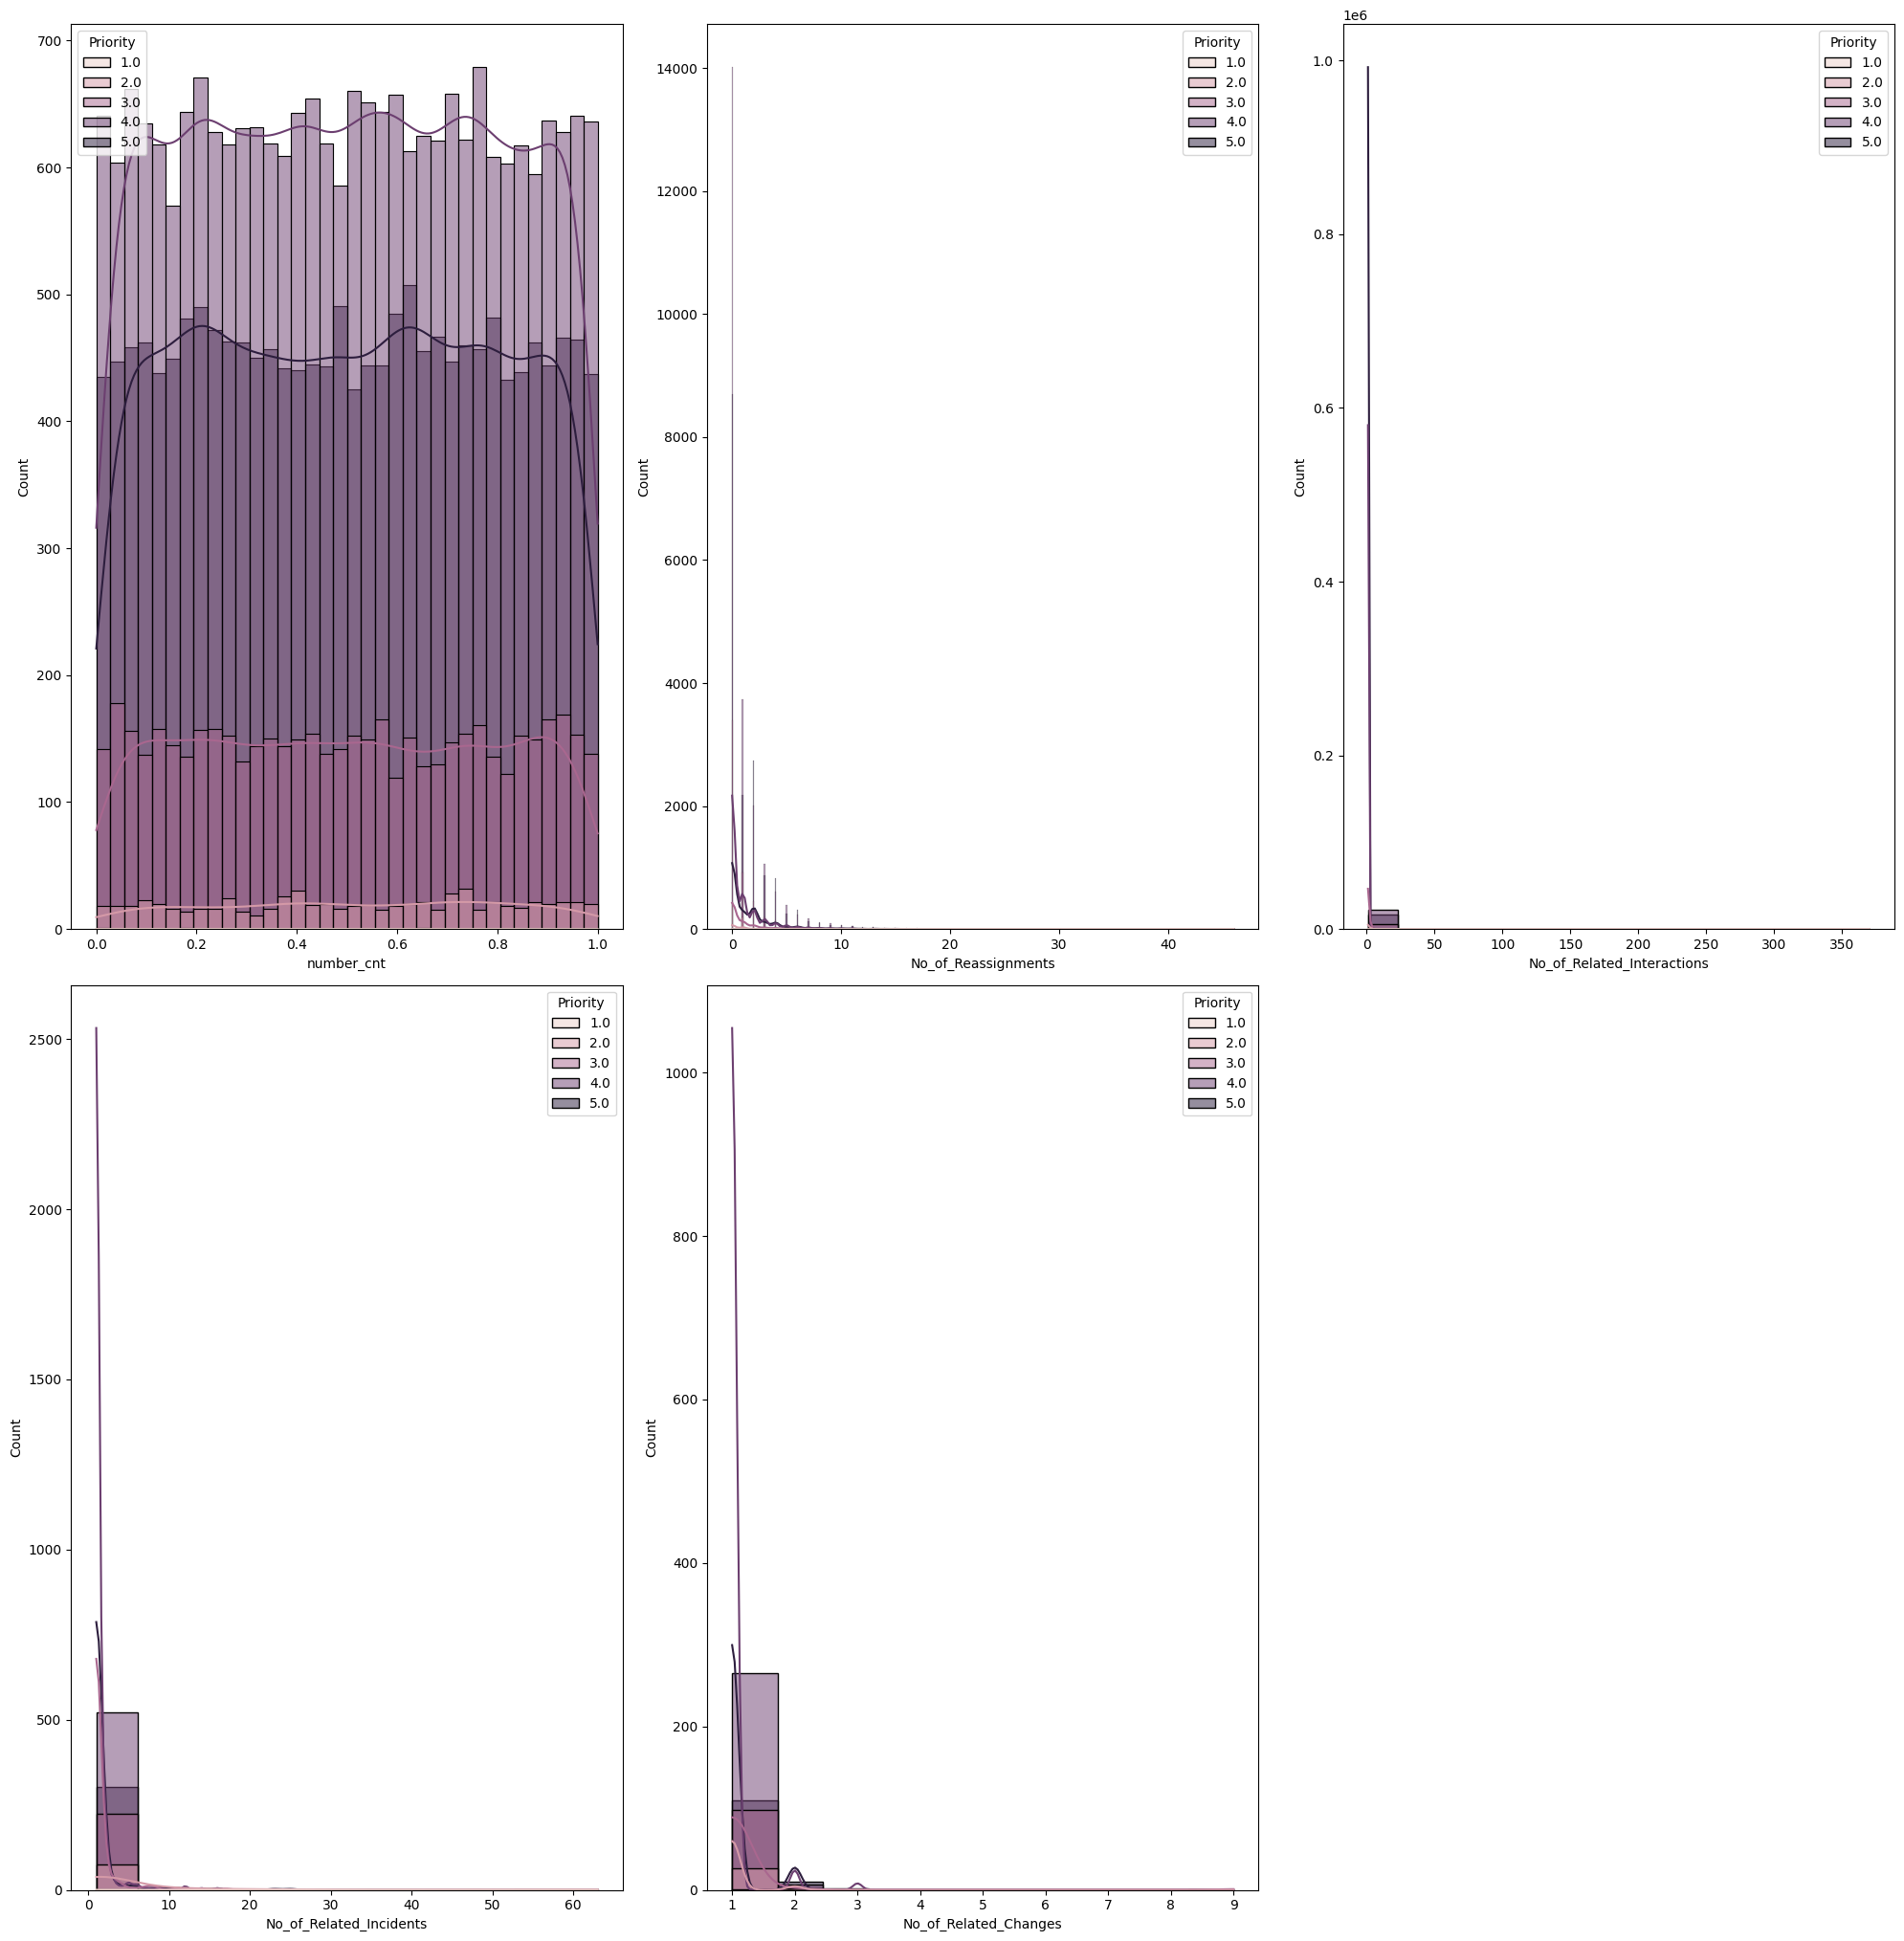

In [480]:
plt.figure(figsize =(20,30))
plotnumber = 1
for i in df1:
    plt.subplot(3,3,plotnumber)
    sns.histplot(x = df1[i],kde=True,hue= df.Priority)
    plotnumber += 1
plt.tight_layout()
    

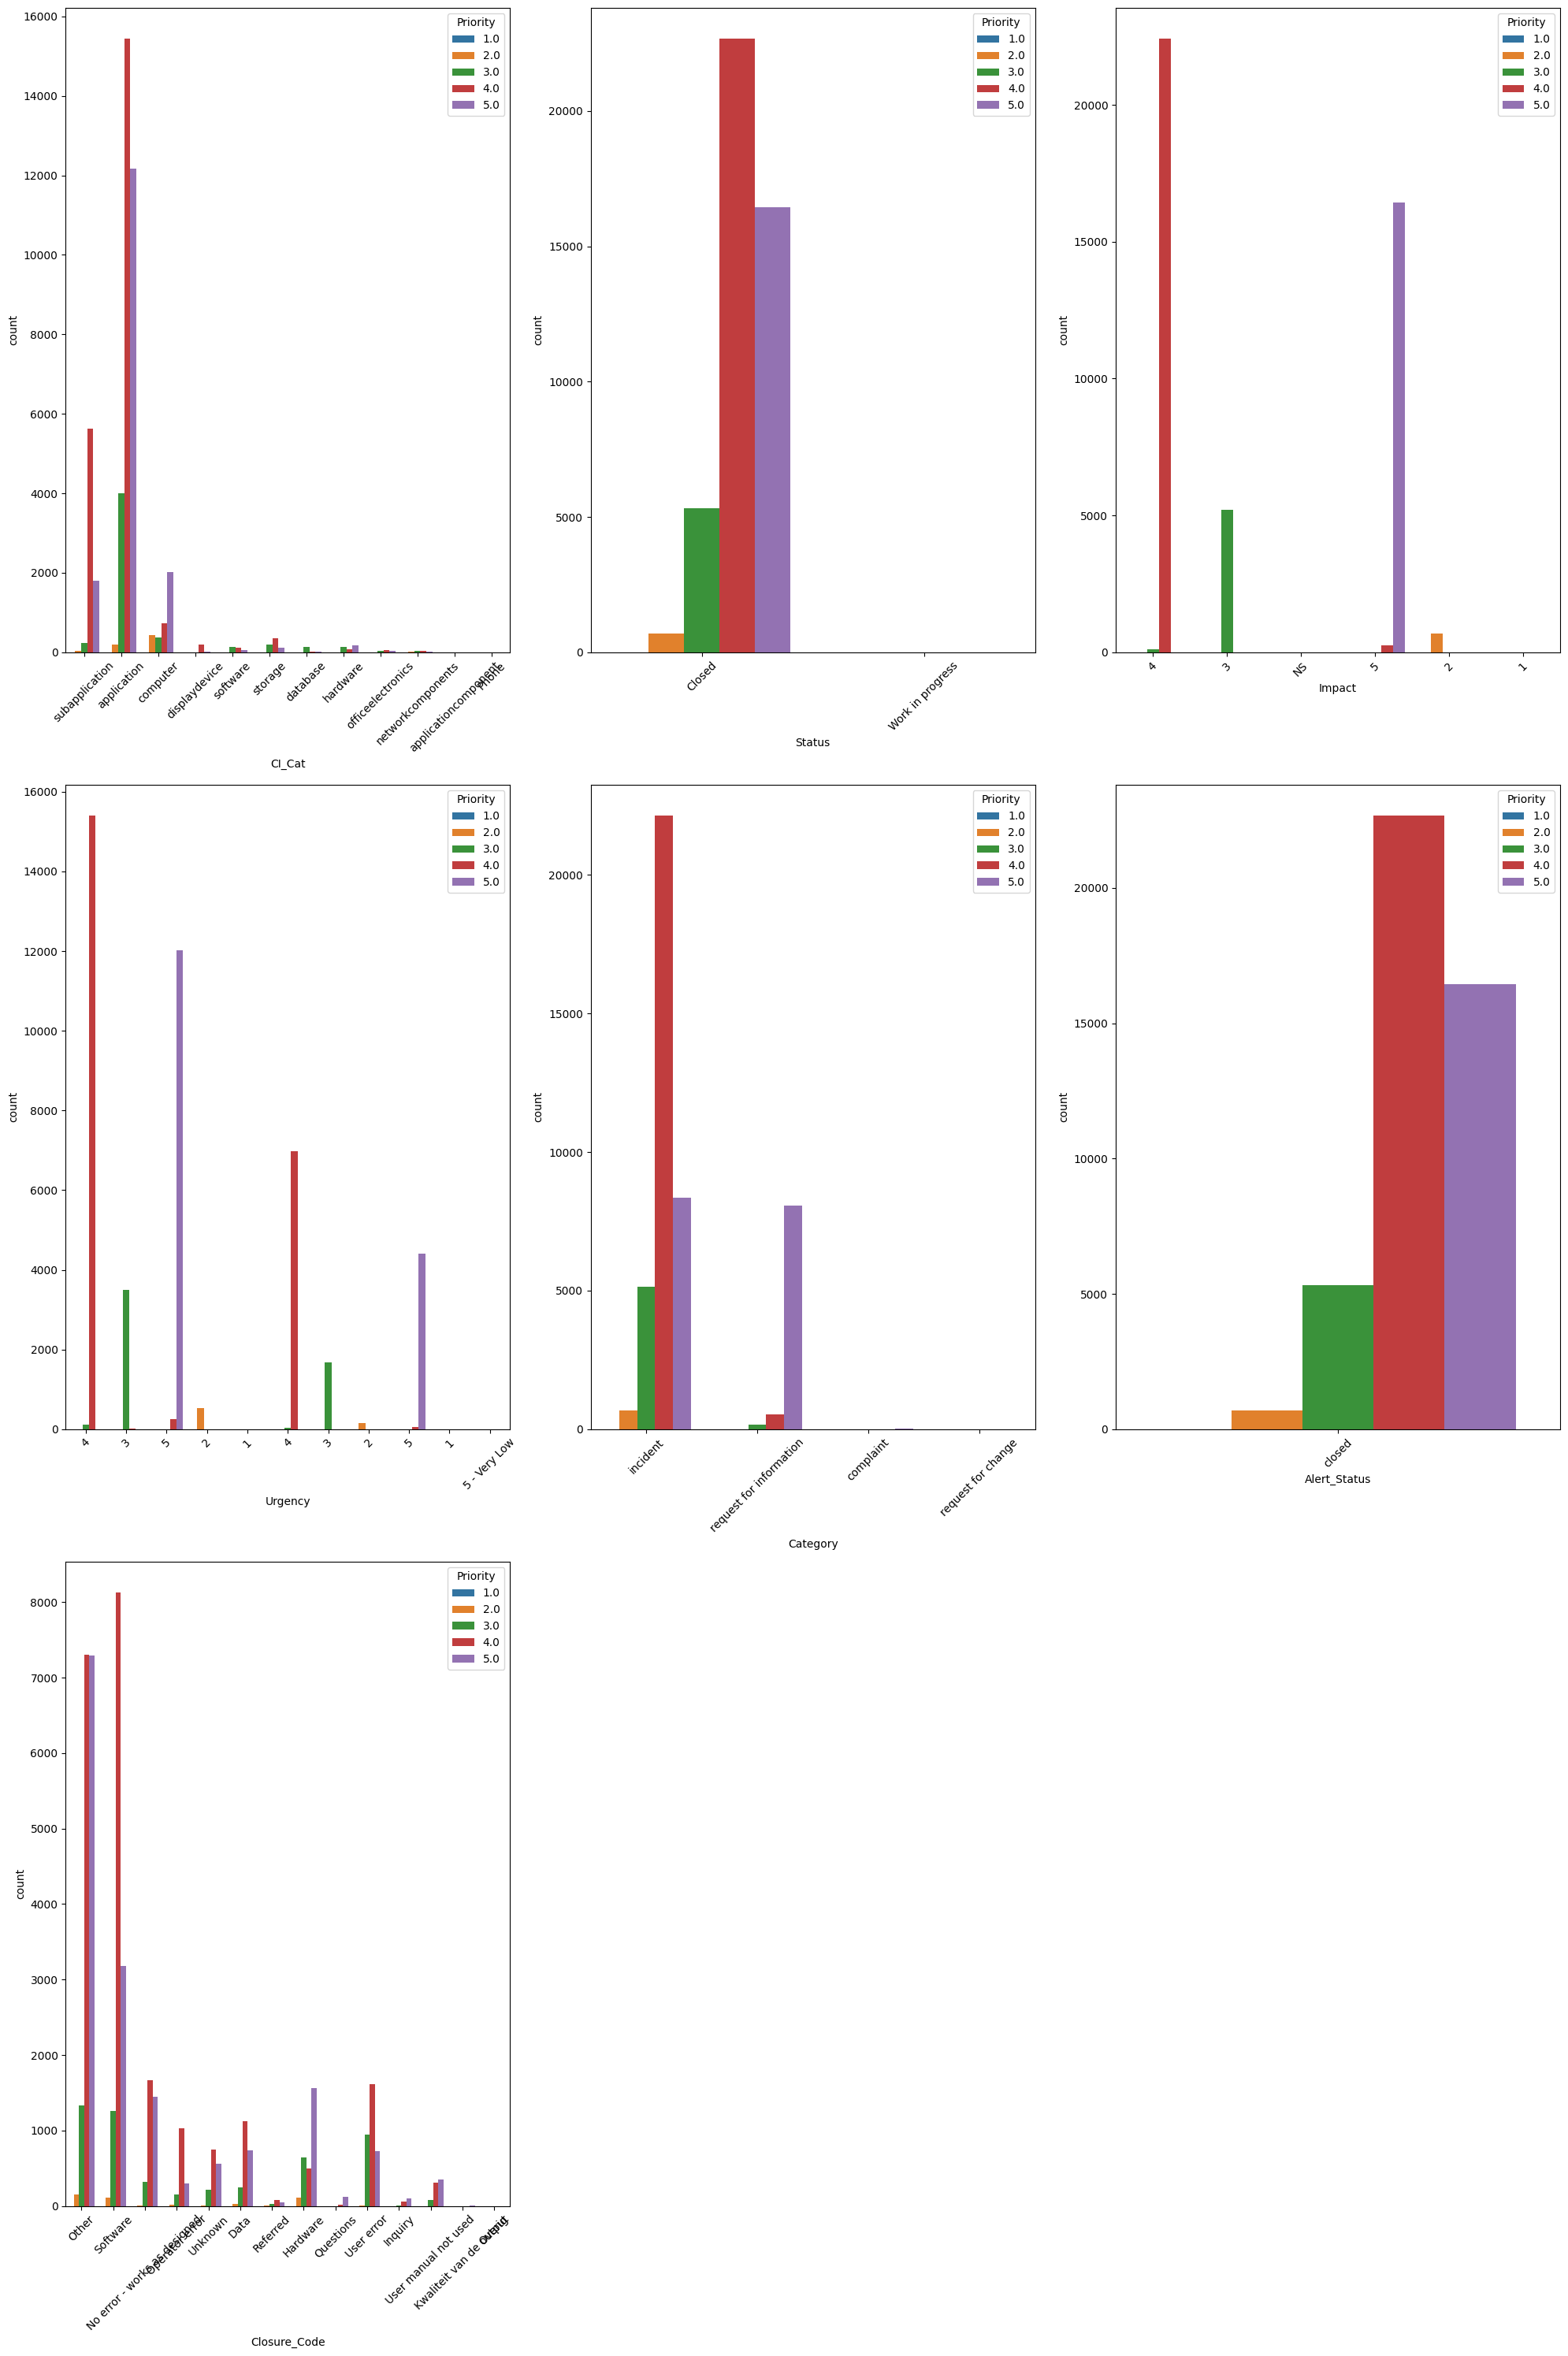

In [481]:
plt.figure(figsize =(20,30))
plotnumber = 1
for i in df2:
    if len(df2[i].unique()) < 20:
        plt.subplot(3,3,plotnumber)
        plt.xticks(rotation = 45)
        sns.countplot(x = df2[i],hue= df.Priority)
        plotnumber += 1
plt.tight_layout()
    

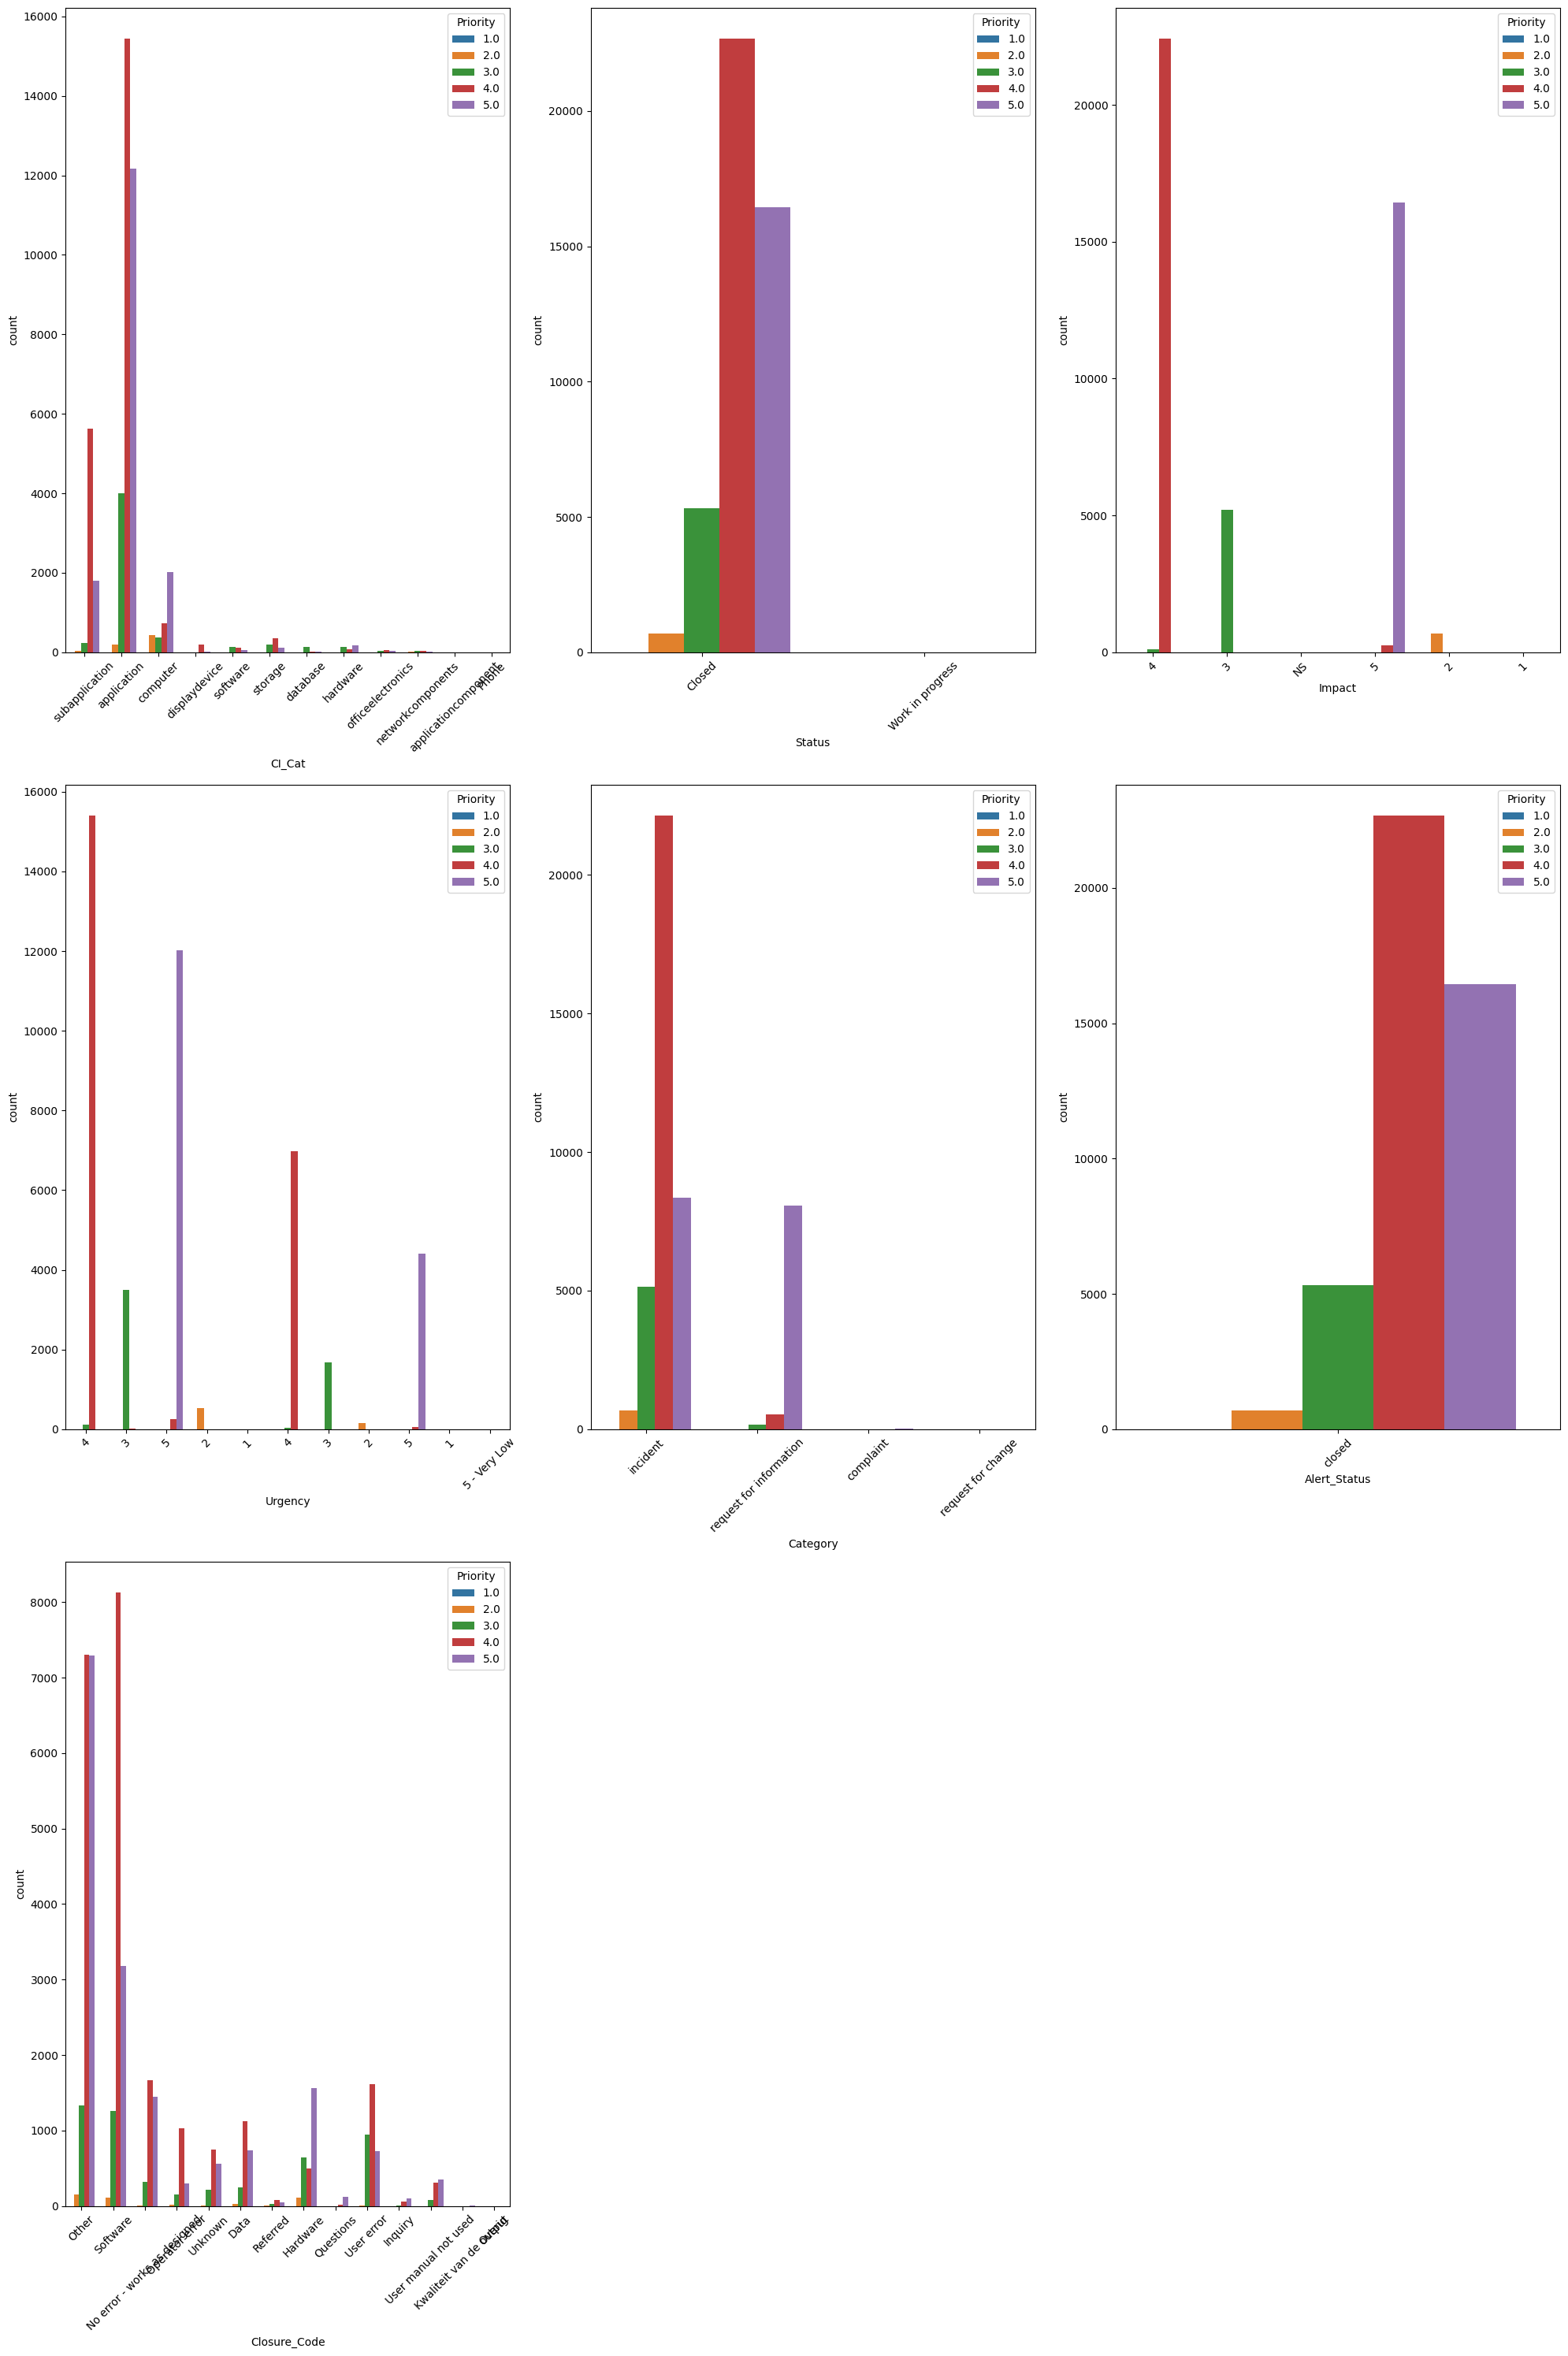

In [482]:
plt.figure(figsize=(20,30))
plotnumber = 1
for i in df2:
    if len(df2[i].unique()) < 20:
        plt.subplot(3,3,plotnumber)
        plt.xticks(rotation = 45)
        sns.countplot(x=df2[i],hue=df.Priority )
        plotnumber += 1
plt.tight_layout()

# EDA(Exploratory Data Analysis)

In [483]:
df.isnull().sum()

CI_Cat                          111
CI_Subcat                       111
WBS                               0
Status                            0
Impact                            0
Urgency                           0
Priority                       1379
number_cnt                        0
Category                          0
Alert_Status                      0
No_of_Reassignments               1
Open_Time                         0
Reopen_Time                   44231
Resolved_Time                  1776
Close_Time                        0
Handle_Time_hrs                   1
Closure_Code                    460
No_of_Related_Interactions      110
Related_Interaction               0
No_of_Related_Incidents       45290
No_of_Related_Changes         45952
Related_Change                45952
dtype: int64

In [484]:
df.shape

(46511, 22)

In [485]:
df.drop(columns=["Reopen_Time","No_of_Related_Incidents","No_of_Related_Changes","Related_Change"],inplace=True)

In [486]:
df.CI_Cat.value_counts()

application             32830
subapplication           7769
computer                 3637
storage                   703
hardware                  441
software                  331
database                  213
displaydevice             210
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: CI_Cat, dtype: int64

In [487]:
df.CI_Subcat.value_counts()

Server Based Application    18769
Web Based Application       15290
Desktop Application          3868
Laptop                       1918
SAP                          1192
                            ...  
VMWare                          1
Application Server              1
NonStop Storage                 1
Protocol                        1
Security Software               1
Name: CI_Subcat, Length: 64, dtype: int64

In [488]:
df.Resolved_Time.value_counts()

10-10-2013 12:53    7
26-03-2014 10:24    6
10-03-2014 09:42    6
21-01-2014 08:29    6
20-11-2013 16:36    6
                   ..
02-12-2013 10:20    1
02-12-2013 10:07    1
02-12-2013 08:43    1
29-11-2013 16:52    1
31-03-2014 22:47    1
Name: Resolved_Time, Length: 33575, dtype: int64

In [489]:
# Fill missing values with placeholders or statistical measures
df['CI_Cat'].fillna('application', inplace=True)
df['CI_Subcat'].fillna('Server Based Application', inplace=True)
df['Priority'].fillna(df['Priority'].mode()[0], inplace=True)
df['Closure_Code'].fillna('Other', inplace=True)
df['No_of_Related_Interactions'].fillna(df['No_of_Related_Interactions'].mean(), inplace=True)
df['No_of_Reassignments'].fillna(df['No_of_Reassignments'].mean(), inplace=True)


In [490]:
import pandas as pd

# Convert the 'Handle_Time_hrs' column to numeric
df['Handle_Time_hrs'] = pd.to_numeric(df['Handle_Time_hrs'], errors='coerce')

# Fill missing values with the mean
df['Handle_Time_hrs'].fillna(df['Handle_Time_hrs'].mean(), inplace=True)


In [491]:
# For numerical values in hours or days, use the mean or median time
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'])
df['Resolved_Time'].fillna(df['Resolved_Time'].median(), inplace=True)


In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46511 non-null  object        
 1   CI_Subcat                   46511 non-null  object        
 2   WBS                         46511 non-null  object        
 3   Status                      46511 non-null  object        
 4   Impact                      46511 non-null  object        
 5   Urgency                     46511 non-null  object        
 6   Priority                    46511 non-null  float64       
 7   number_cnt                  46511 non-null  float64       
 8   Category                    46511 non-null  object        
 9   Alert_Status                46511 non-null  object        
 10  No_of_Reassignments         46511 non-null  float64       
 11  Open_Time                   46511 non-null  object    

In [493]:
df.head(3)

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,subapplication,Web Based Application,WBS000162,Closed,4,4,4.0,0.601292,incident,closed,26.0,05-02-2012 13:32,2013-04-11 13:50:00,04-11-2013 13:51,2.625,Other,1.0,SD0000007
1,application,Web Based Application,WBS000088,Closed,3,3,3.0,0.415050,incident,closed,33.0,12-03-2012 15:44,2013-02-12 12:36:00,02-12-2013 12:36,2.625,Software,1.0,SD0000011
2,application,Desktop Application,WBS000092,Closed,NS,3,4.0,0.517551,request for information,closed,3.0,29-03-2012 12:36,2014-01-13 15:12:00,13-01-2014 15:13,2.625,No error - works as designed,1.0,SD0000017


In [494]:
df.corr()

,Priority,number_cnt,No_of_Reassignments,Handle_Time_hrs,No_of_Related_Interactions
Priority,1.000000,-0.000615,0.088718,0.011530,-0.023711
number_cnt,-0.000615,1.000000,-0.001332,0.006729,0.001056
No_of_Reassignments,0.088718,-0.001332,1.000000,0.017296,0.036364
Handle_Time_hrs,0.011530,0.006729,0.017296,1.000000,-0.000019
No_of_Related_Interactions,-0.023711,0.001056,0.036364,-0.000019,1.000000


<AxesSubplot:>

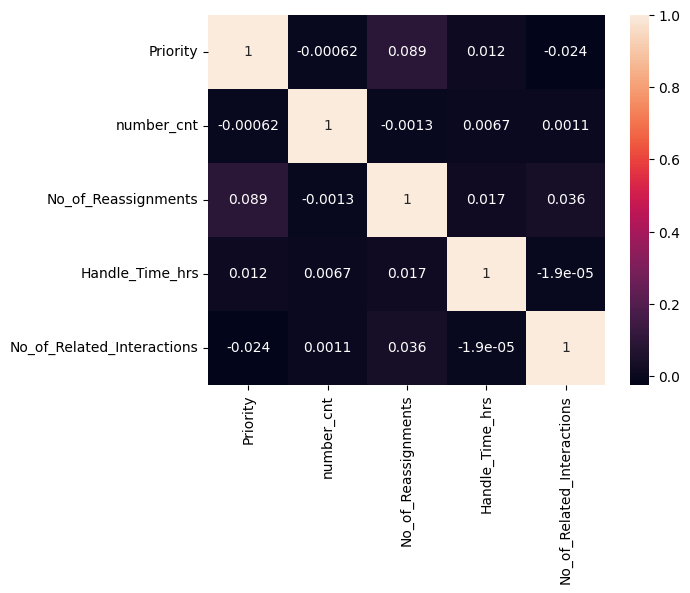

In [495]:
sns.heatmap(df.corr(),annot= True)

# feature engineering

In [496]:
# Keep only relevant features and target variable
df1 = df[['Impact','Urgency', 'No_of_Reassignments', 'Priority']]

# Convert Priority to binary (if needed) to classify Priority 1 & 2 as high priority
df1['High_Priority'] = df1['Priority'].apply(lambda x: 1 if x <= 2 else 0)

# Drop the original Priority column
df1.drop('Priority', axis=1, inplace=True)


print(df1.head())


  Impact Urgency  No_of_Reassignments  High_Priority
0      4       4                 26.0              0
1      3       3                 33.0              0
2     NS       3                  3.0              0
3      4       4                 13.0              0
4      4       4                  2.0              0


In [497]:
df.Impact.unique()

array(['4', '3', 'NS', '5', '2', '1'], dtype=object)

In [498]:
df1.Impact.value_counts()

4     22520
5     16697
3      5222
NS     1379
2       690
1         3
Name: Impact, dtype: int64

In [499]:
df1.loc[df1.Impact == "NS", "Impact"] = "4"


In [500]:
df1.Impact.value_counts()

4    23899
5    16697
3     5222
2      690
1        3
Name: Impact, dtype: int64

In [501]:
df1.Urgency.value_counts()

4               15540
5               12270
4                7011
5                4465
3                4419
3                2105
2                 538
2                 156
1                   5
1                   1
5 - Very Low        1
Name: Urgency, dtype: int64

In [502]:
df1.loc[df1.Urgency == '5 - Very Low', 'Urgency'] = 5


In [503]:
df1['Impact'] = df1['Impact'].astype(int)
df1['Urgency'] = df1['Urgency'].astype(int)
df1['No_of_Reassignments'] = df1['No_of_Reassignments'].astype(int)


## model creation

In [504]:
X =df1[["Impact","Urgency","No_of_Reassignments"]]
X

,Impact,Urgency,No_of_Reassignments
0,4,4,26
1,3,3,33
2,4,3,3
3,4,4,13
4,4,4,2
...,...,...,...
46506,4,4,0
46507,4,4,0
46508,5,5,0
46509,4,4,0


In [505]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Impact               46511 non-null  int32
 1   Urgency              46511 non-null  int32
 2   No_of_Reassignments  46511 non-null  int32
dtypes: int32(3)
memory usage: 545.2 KB


In [506]:
df.No_of_Reassignments.value_counts

<bound method IndexOpsMixin.value_counts of 0        26.0
1        33.0
2         3.0
3        13.0
4         2.0
         ... 
46506     0.0
46507     0.0
46508     0.0
46509     0.0
46510     0.0
Name: No_of_Reassignments, Length: 46511, dtype: float64>

In [507]:
df.Impact.value_counts()

4     22520
5     16697
3      5222
NS     1379
2       690
1         3
Name: Impact, dtype: int64

In [508]:
df['Impact'] = pd.to_numeric(df['Impact'], errors='coerce')  # Convert to numeric, setting non-numeric values as NaN
df['Impact'].fillna(df['Impact'].median(), inplace=True)  # Replace NaN with median

In [509]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Impact               46511 non-null  int32
 1   Urgency              46511 non-null  int32
 2   No_of_Reassignments  46511 non-null  int32
dtypes: int32(3)
memory usage: 545.2 KB


In [510]:
y = df1.High_Priority
y

0        0
1        0
2        0
3        0
4        0
        ..
46506    0
46507    0
46508    0
46509    0
46510    0
Name: High_Priority, Length: 46511, dtype: int64

In [511]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=42)

In [512]:
X_train

,Impact,Urgency,No_of_Reassignments
15259,5,5,0
7315,4,4,5
31054,4,4,0
17930,5,5,0
15953,3,3,1
...,...,...,...
11284,3,3,3
44732,5,5,0
38158,4,4,0
860,4,4,1


In [513]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37208, 3)
(9303, 3)
(37208,)
(9303,)


In [514]:
X.isnull().sum()

Impact                 0
Urgency                0
No_of_Reassignments    0
dtype: int64

In [515]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [516]:
y_pred_lr=LR.predict(X_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [517]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr)

1.0

In [518]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9169
           1       1.00      1.00      1.00       134

    accuracy                           1.00      9303
   macro avg       1.00      1.00      1.00      9303
weighted avg       1.00      1.00      1.00      9303



In [281]:
df1

,Impact,Urgency,No_of_Reassignments,High_Priority
0,4,4,26,0
1,3,3,33,0
2,4,3,3,0
3,4,4,13,0
4,4,4,2,0
...,...,...,...,...
46506,4,4,0,0
46507,4,4,0,0
46508,5,5,0,0
46509,4,4,0,0


## with balancing 

In [519]:
from imblearn.over_sampling import SMOTE   # Creating an instance for Balancing
sm = SMOTE()

In [520]:
y.value_counts()

0    45813
1      698
Name: High_Priority, dtype: int64

In [521]:
x_sm,y_sm = sm.fit_resample(X_train,y_train)

In [522]:
y_sm.value_counts()

0    36644
1    36644
Name: High_Priority, dtype: int64

In [523]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_sm))

Counter({0: 36644, 1: 564})
Counter({0: 36644, 1: 36644})


In [524]:
LR1 = LogisticRegression()
LR1.fit(x_sm,y_sm)

LogisticRegression()

In [288]:
y_pred_lr1 =  LR1.predict(X_test)
y_pred_lr1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [289]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_lr1)

1.0

In [290]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lr1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9169
           1       1.00      1.00      1.00       134

    accuracy                           1.00      9303
   macro avg       1.00      1.00      1.00      9303
weighted avg       1.00      1.00      1.00      9303



## SVM(Support vector machine )

### without balancing

In [291]:
from sklearn.svm import SVC
sv = SVC()

In [292]:
sv.fit(X_train,y_train)

SVC()

In [293]:
y_predict_train = sv.predict(X_train)
y_predict_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [294]:
acc1 = accuracy_score(y_train,y_predict_train)
acc1

0.999973124059342

In [295]:
y_predict = sv.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [296]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report

In [297]:
acc_score = accuracy_score(y_test,y_predict)
acc_score

0.99978501558637

In [298]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9169
           1       1.00      0.99      0.99       134

    accuracy                           1.00      9303
   macro avg       1.00      0.99      1.00      9303
weighted avg       1.00      1.00      1.00      9303



## With balancing

In [299]:
sv1 = SVC()
sv1.fit(x_sm,y_sm)

SVC()

In [300]:
y_pred1 = sv1.predict(X_test)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [301]:
acc_score = accuracy_score(y_test,y_pred1)
acc_score 


1.0

In [302]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9169
           1       1.00      0.99      0.99       134

    accuracy                           1.00      9303
   macro avg       1.00      0.99      1.00      9303
weighted avg       1.00      1.00      1.00      9303



## Decisison tree


In [303]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [304]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [305]:
y_pred_train = dt.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [306]:
acc = accuracy_score(y_train,y_pred_train)
acc

1.0

In [307]:
y_predd = dt.predict(X_test)
y_predd 


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [308]:
acc = accuracy_score(y_test,y_predd)
acc

1.0

In [309]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9169
           1       1.00      0.99      0.99       134

    accuracy                           1.00      9303
   macro avg       1.00      0.99      1.00      9303
weighted avg       1.00      1.00      1.00      9303



## Gradient Decent Boosting

In [310]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [311]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [312]:
y_pred_trainn = gbc.predict(X_train)
y_pred_trainn

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [313]:
ACC = accuracy_score(y_train,y_predict_train)
ACC

0.999973124059342

In [314]:
y_predd = gbc.predict(X_test)
y_predd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [315]:
ACC1 = accuracy_score(y_test,y_predd)
ACC1

1.0

In [316]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9169
           1       1.00      0.99      0.99       134

    accuracy                           1.00      9303
   macro avg       1.00      0.99      1.00      9303
weighted avg       1.00      1.00      1.00      9303



## XGB

In [317]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [318]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [319]:
y_hat_train = xgb.predict(X_train)
y_hat_train

array([0, 0, 0, ..., 0, 0, 0])

In [320]:
ACCA = accuracy_score(y_train,y_hat_train)
ACCA

1.0

In [321]:
y_hat = xgb.predict(X_test)

In [322]:
ACC2B = accuracy_score(y_test,y_hat)
ACC2B

1.0

In [323]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9169
           1       1.00      0.99      0.99       134

    accuracy                           1.00      9303
   macro avg       1.00      0.99      1.00      9303
weighted avg       1.00      1.00      1.00      9303



# Task - 2


### Business case :- Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning.

​

In [324]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

## Prepare the Data

In [325]:
df.head()

,CI_Cat,CI_Subcat,WBS,Status,Impact,Urgency,Priority,number_cnt,Category,Alert_Status,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction
0,subapplication,Web Based Application,WBS000162,Closed,4.0,4,4.0,0.601292,incident,closed,26.0,05-02-2012 13:32,2013-04-11 13:50:00,04-11-2013 13:51,2.625,Other,1.0,SD0000007
1,application,Web Based Application,WBS000088,Closed,3.0,3,3.0,0.415050,incident,closed,33.0,12-03-2012 15:44,2013-02-12 12:36:00,02-12-2013 12:36,2.625,Software,1.0,SD0000011
2,application,Desktop Application,WBS000092,Closed,4.0,3,4.0,0.517551,request for information,closed,3.0,29-03-2012 12:36,2014-01-13 15:12:00,13-01-2014 15:13,2.625,No error - works as designed,1.0,SD0000017
3,application,Web Based Application,WBS000088,Closed,4.0,4,4.0,0.642927,incident,closed,13.0,17-07-2012 11:49,2013-11-14 09:31:00,14-11-2013 09:31,2.625,Operator error,1.0,SD0000025
4,application,Web Based Application,WBS000088,Closed,4.0,4,4.0,0.345258,incident,closed,2.0,10-08-2012 11:01,2013-08-11 13:55:00,08-11-2013 13:55,2.625,Other,1.0,SD0000029


In [326]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'], errors='coerce')

In [327]:
df_monthly = df.resample('M', on='Open_Time').size().reset_index(name='Incident_Volume')

In [328]:
print(df_monthly.head())

   Open_Time  Incident_Volume
0 2012-01-31                1
1 2012-02-29                1
2 2012-03-31                2
3 2012-04-30                0
4 2012-05-31                2


# EDA

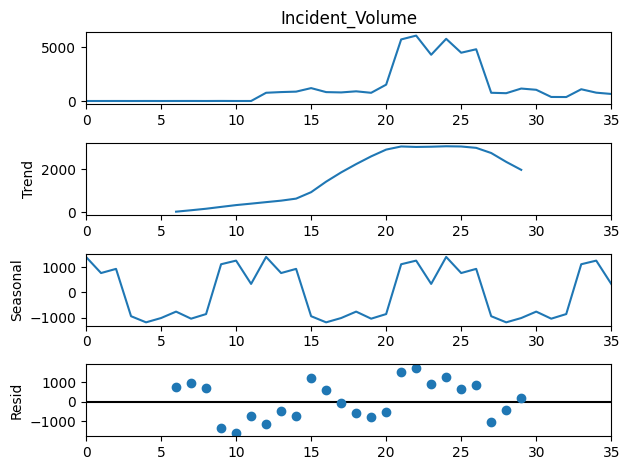

In [329]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_monthly['Incident_Volume'], model='additive', period=12)
result.plot()
plt.show()

## Insights :-
Trend: The upward trend initially shows an increase, peaking around the midpoint, then stabilizing.

Seasonal: The series has regular, repeating patterns, indicating seasonality, with ups and downs.

Residuals: Random variations are centered around zero, suggesting no significant pattern or error trend.

This decomposition helps identify the underlying trend, repeating seasonal patterns, and random noise in the incident volume data.

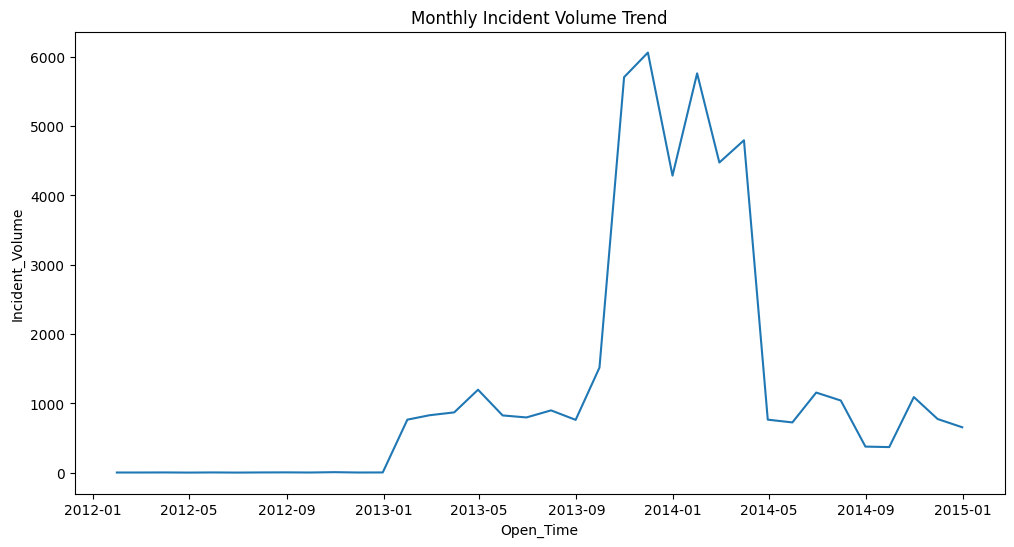

In [330]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Open_Time', y='Incident_Volume', data=df_monthly)
plt.title('Monthly Incident Volume Trend')
plt.show()

## Insights:

Low Volume in 2012 to Early 2013: Incident volume is very low, indicating fewer issues or a smoothly running system.

Spike in Early 2013: A sudden increase could be due to new reporting practices, a system change, or an operational issue.

Fluctuations in 2013-2014: Volume fluctuates with peaks suggesting workload surges and drops indicating recovery periods. A decrease in early 2014 may show a resolved issue.

High Volumes in 2014: Sustained high volume with peaks and dips suggests recurring issues or seasonal patterns.

Stabilization in Late 2014: A drop toward the end of 2014 hints at improvements in processes or management.

Recommendations:

Analyze early 2013 spikes to identify triggers.
Check for patterns in 2013-2014 for better resource planning.
Investigate late 2014 improvements to replicate success.
Use trends for forecasting to allocate resources effectively.

## Check for Stationarity (ADF Test)
A stationary time series is required for models like ARIMA.

In [331]:
result = adfuller(df_monthly['Incident_Volume'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.896985596178057
p-value: 0.3334805075611019


In [332]:
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

The time series is not stationary.


In [333]:
df_monthly['Diff_Volume'] = df_monthly['Incident_Volume'].diff().dropna()

### Build and Train the ARIMA Model
If the series is not stationary, you can difference the data.

C:\Users\Dell\anaconda3\envs\notebook\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


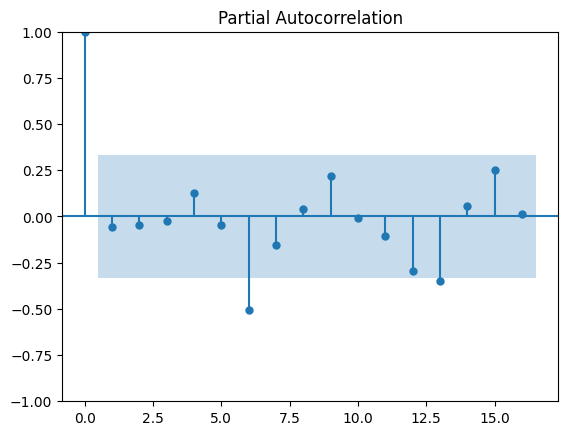

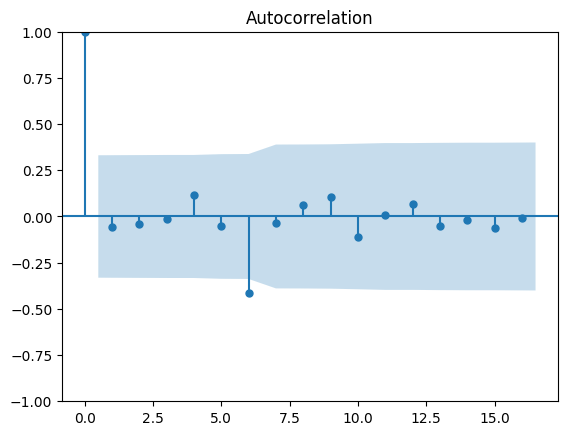

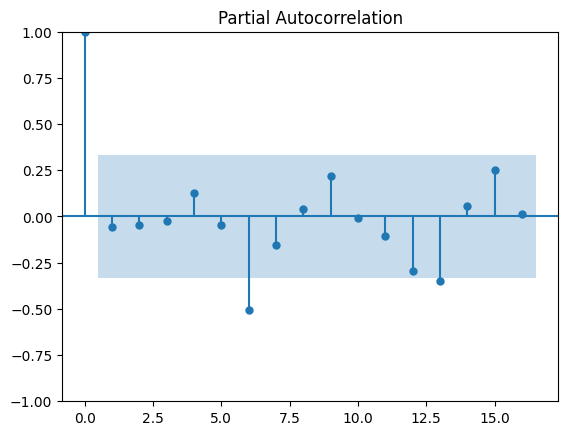

In [334]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df_monthly['Incident_Volume'].diff().dropna())
plot_pacf(df_monthly['Incident_Volume'].diff().dropna())

## Insights :-
Strong Lag-1 Correlation: The high bar at lag 1 indicates a strong autocorrelation, meaning each data point is closely related to the previous one.

Diminishing Correlation: The correlation decreases with each lag, suggesting that the influence of past points fades over time.

Random Noise: Most lags fall within the shaded area, indicating that these correlations are not statistically significant, likely due to random noise.

This plot suggests some short-term dependency but no long-term autocorrelation.

In [335]:
pip install pmdarima

In [336]:
from pmdarima import auto_arima
model = auto_arima(df_monthly['Incident_Volume'], seasonal=False, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=615.704, Time=0.39 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=659.149, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=609.725, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=634.250, Time=0.07 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=611.712, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=611.712, Time=0.18 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=613.667, Time=0.37 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=610.359, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 1.314 seconds


In [337]:
model = ARIMA(df_monthly['Incident_Volume'], order=(1, 1, 1))
model_fit = model.fit()

In [338]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        Incident_Volume   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -294.465
Date:                Tue, 21 Jan 2025   AIC                            594.929
Time:                        11:15:26   BIC                            599.595
Sample:                             0   HQIC                           596.540
                                 - 36                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8463      0.072     11.704      0.000       0.705       0.988
ma.L1         -0.9997      0.109     -9.200      0.000      -1.213      -0.787
sigma2      1.145e+06   9.54e-08    1.2e+13      0.0

### Forecast Quarterly and Annual Volume

In [339]:
forecast = model_fit.forecast(steps=4)

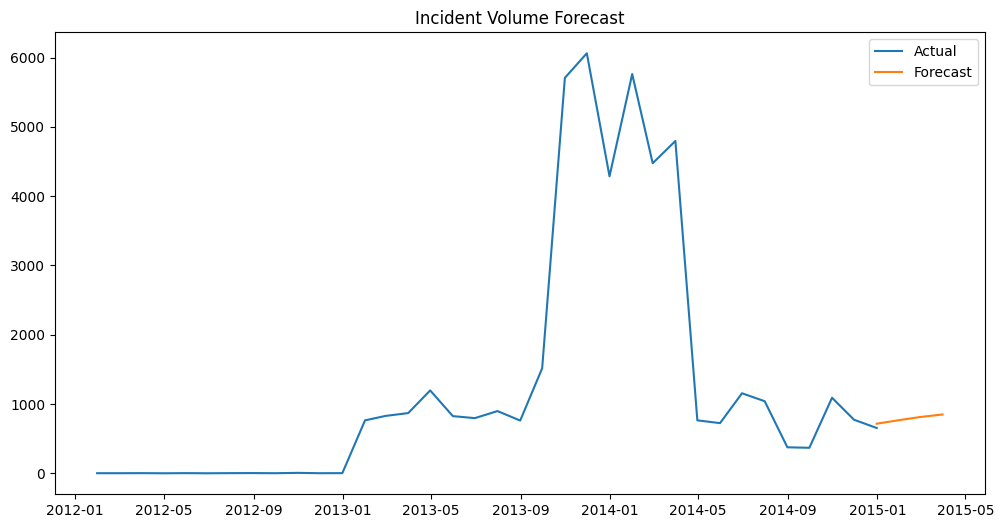

In [340]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Open_Time'], df_monthly['Incident_Volume'], label='Actual')
plt.plot(pd.date_range(start=df_monthly['Open_Time'].max(), periods=4, freq='M'), forecast, label='Forecast')
plt.title('Incident Volume Forecast')
plt.legend()
plt.show()

In [341]:
forecast = model_fit.forecast(steps=12)

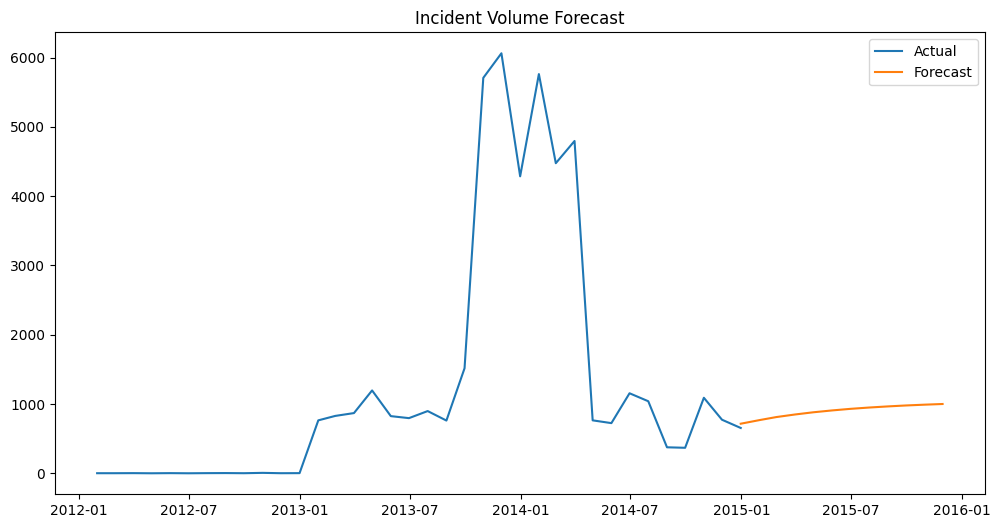

In [342]:
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['Open_Time'], df_monthly['Incident_Volume'], label='Actual')
plt.plot(pd.date_range(start=df_monthly['Open_Time'].max(), periods=12, freq='M'), forecast, label='Forecast')
plt.title('Incident Volume Forecast')
plt.legend()
plt.show()

## Insights :-

Trend Observation:

The blue line (actual data) shows high fluctuation between 2013 and 2014, peaking and dropping often. After mid-2014, incident volume begins to decline.

Forecast Pattern:

The orange line (forecast) remains steady, predicting around 600-700 incidents per month, showing fewer fluctuations. Forecast vs. Reality:

The forecast smooths out past volatility, assuming a stable future and possibly missing potential spikes.

Model Limitations:

The model may not capture sudden peaks or drops well, suggesting it expects incident volume to average out over time.

Planning Implications:

If stable, the forecast allows for consistent resource planning. If actual fluctuations continue, adaptive planning may be necessary to handle potential spikes.

## Evaluate the Model with RMSE
Split the data into train/test sets to evaluate the model performance.

In [343]:
train_size = int(len(df_monthly) * 0.8)
train, test = df_monthly['Incident_Volume'][:train_size], df_monthly['Incident_Volume'][train_size:]

In [344]:
model = ARIMA(train, order=(1, 1, 1))
model_fit = model.fit()

In [345]:
forecast = model_fit.forecast(steps=len(test))

In [346]:
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 428.1148607689841


In [347]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [348]:
from prophet import Prophet

In [349]:
# Prepare the data for Prophet
df_prophet = df_monthly.rename(columns={'Open_Time': 'ds', 'Incident_Volume': 'y'})

In [354]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

11:17:49 - cmdstanpy - INFO - Chain [1] start processing
11:17:49 - cmdstanpy - INFO - Chain [1] done processing


In [355]:
# Make a forecast for the next 12 months
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

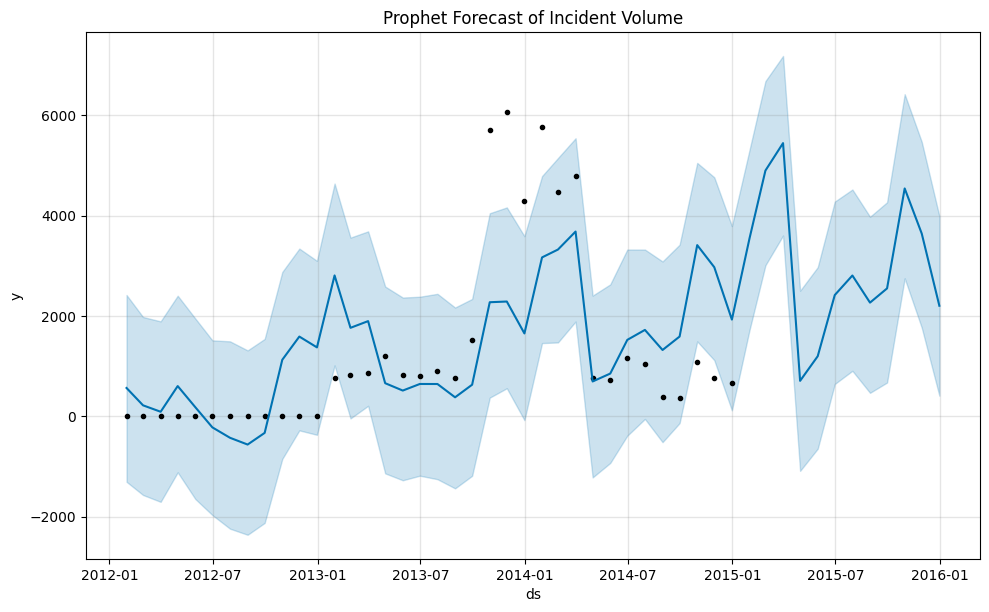

In [356]:
###### Plot the forecast
fig = model.plot(forecast)
plt.title('Prophet Forecast of Incident Volume')
plt.show()

### Insights from the Prophet Forecast of Incident Volume Graph:
Actual vs. Forecasted:

The blue line shows forecasted incidents, while black dots represent actual incident data.

Uncertainty Range:

The light blue area around the forecast shows confidence intervals, with wider intervals towards 2015-2016 indicating higher prediction uncertainty.

Trend & Pattern:

The forecast shows a general increase in incidents over time, with recurring peaks and dips suggesting seasonal patterns.

Deviations:

Some actual data points fall outside the forecast range, especially in 2013-2014, showing the model missed some peak incidents.

Forecast Trend:

The forecast anticipates higher volatility, with bigger fluctuations expected around 2015-2016.

Implications:

Plan for increased resource scaling to manage rising incident volumes. Regularly update forecasts due to increasing uncertainty over time.

# Conclusion:-
This analysis provides a comprehensive approach to forecasting incident volumes, aiding in better resource and technology planning. Key takeaways are:

Identified Patterns: We detected seasonal patterns, trends, and fluctuations in incident volume, with significant surges in 2013-2014 and a slight stabilization towards the end of 2014.

Model Performance: Using ARIMA and Prophet models, we generated forecasts showing an expected average volume between 600-700 incidents monthly. However, the models' limitations in capturing sudden peaks and drops suggest that actual incident volumes may still fluctuate significantly, especially during unexpected operational surges.

Planning Implications:

Resource Planning: For steady periods, resources can be planned based on the forecasted average. However, an adaptive approach may be necessary to handle unexpected spikes.
Seasonal Adjustments: Recurring patterns suggest that resources can be adjusted seasonally to accommodate predictable fluctuations.
Model Updates: As prediction uncertainty increases over time, regularly updating models with new data will help maintain forecast accuracy.
Recommended Actions:

Investigate additional variables to refine forecasting.
Continuously monitor and adjust resources based on real-time incident trends.
Use quarterly and annual forecasts for proactive resource scaling and to manage future incidents effectively.
This forecasting approach equips the organization to be better prepared, responsive, and resilient to incident volume changes, ensuring efficient resource allocation and operational continuity.

# Task:-3
Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

In [358]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46511 non-null  object        
 1   CI_Subcat                   46511 non-null  object        
 2   WBS                         46511 non-null  object        
 3   Status                      46511 non-null  object        
 4   Impact                      46511 non-null  float64       
 5   Urgency                     46511 non-null  object        
 6   Priority                    46511 non-null  float64       
 7   number_cnt                  46511 non-null  float64       
 8   Category                    46511 non-null  object        
 9   Alert_Status                46511 non-null  object        
 10  No_of_Reassignments         46511 non-null  float64       
 11  Open_Time                   46511 non-null  datetime64

In [359]:
df.CI_Cat.unique()

array(['subapplication', 'application', 'computer', 'displaydevice',
       'software', 'storage', 'database', 'hardware', 'officeelectronics',
       'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object)

In [360]:
df.CI_Subcat.unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'SAP', 'Client Based Application',
       'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
       'Linux Server', 'Monitor', 'Automation Software', 'SAN',
       'Banking Device', 'Desktop', 'Database', 'Oracle Server',
       'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
       'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
       'DataCenterEquipment', 'KVM Switches', 'Switch',
       'Database Software', 'Network Component', 'Unix Server', 'Lines',
       'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server',
       'Application Server', 'Security Software', 'Thin Client',
       'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server',
       'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony',
       'Windows Server in extern beheer', 'Modem', 'X86 Server',
       'ESX Server', 'Virtual Tape Server', 'IPtelephony',
       'No

In [361]:
df.Category.value_counts()

incident                   37678
request for information     8821
complaint                     11
request for change             1
Name: Category, dtype: int64

In [362]:
df.Urgency.value_counts()

4               15540
5               12270
4                7011
5                4465
3                4419
3                2105
2                 538
2                 156
1                   5
1                   1
5 - Very Low        1
Name: Urgency, dtype: int64

In [363]:
df.Impact.value_counts()

4.0    23899
5.0    16697
3.0     5222
2.0      690
1.0        3
Name: Impact, dtype: int64

In [364]:
df.Priority.value_counts()

4.0    24058
5.0    16443
3.0     5312
2.0      695
1.0        3
Name: Priority, dtype: int64

In [368]:
df.isnull().sum()

CI_Cat                        0
CI_Subcat                     0
WBS                           0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
dtype: int64

In [370]:
 #Keep only relevant features and target variable
df1 = df[["Impact","Urgency","CI_Cat","CI_Subcat","Status","Category","Priority"]]

In [371]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Impact     46511 non-null  float64
 1   Urgency    46511 non-null  object 
 2   CI_Cat     46511 non-null  object 
 3   CI_Subcat  46511 non-null  object 
 4   Status     46511 non-null  object 
 5   Category   46511 non-null  object 
 6   Priority   46511 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.5+ MB


# Text preprocessing 


In [372]:
from sklearn.preprocessing import LabelEncoder  
label_encoder = LabelEncoder()
df1['Category_Encoded'] = label_encoder.fit_transform(df1['CI_Cat'])
df1['Subcategory_Encoded'] = label_encoder.fit_transform(df1['CI_Subcat'])
df1['Status_Encoded'] = label_encoder.fit_transform(df1['Status'])
df1['Category_Encoded'] = label_encoder.fit_transform(df1['Category'])


C:\Users\Dell\anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Dell\anaconda3\envs\notebook\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a c

In [373]:
import warnings
warnings.filterwarnings("ignore")

In [374]:
df1.columns

Index(['Impact', 'Urgency', 'CI_Cat', 'CI_Subcat', 'Status', 'Category',
       'Priority', 'Category_Encoded', 'Subcategory_Encoded',
       'Status_Encoded'],
      dtype='object')

# splitting the data into X and y

In [375]:
X = df1[['Impact', 'Urgency','Category_Encoded', 'Subcategory_Encoded',]]
X

,Impact,Urgency,Category_Encoded,Subcategory_Encoded
0,4.0,4,1,57
1,3.0,3,1,57
2,4.0,3,3,10
3,4.0,4,1,57
4,4.0,4,1,57
...,...,...,...,...
46506,4.0,4,1,45
46507,4.0,4,1,45
46508,5.0,5,1,21
46509,4.0,4,1,57


In [377]:
X.loc[df.Urgency == '5 - Very Low', 'Urgency'] = 5
X['Urgency'] = X['Urgency'].astype(int)
X['Impact'] = pd.to_numeric(X['Impact'], errors='coerce')
X['Impact'] = X['Impact'].astype(int)

In [378]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Impact               46511 non-null  int32
 1   Urgency              46511 non-null  int32
 2   Category_Encoded     46511 non-null  int32
 3   Subcategory_Encoded  46511 non-null  int32
dtypes: int32(4)
memory usage: 726.9 KB


In [379]:
y = df.Priority
y

0        4.0
1        3.0
2        4.0
3        4.0
4        4.0
        ... 
46506    4.0
46507    4.0
46508    5.0
46509    4.0
46510    3.0
Name: Priority, Length: 46511, dtype: float64

In [380]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [381]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)                        

DecisionTreeClassifier()

In [382]:
y_pred_train = model.predict(X_train) 
y_pred_train

array([5., 4., 4., ..., 4., 4., 5.])

In [383]:
y_pred = model.predict(X_test)
y_pred

array([5., 5., 5., ..., 5., 3., 5.])

In [384]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,classification_report,confusion_matrix

In [385]:
accuracy_score(y_train,y_pred_train)

0.997903676628682

In [386]:
accuracy_score(y_test,y_pred)

0.9978501558636999

In [387]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       134
         3.0       1.00      0.98      0.99      1022
         4.0       1.00      1.00      1.00      4865
         5.0       1.00      1.00      1.00      3282

    accuracy                           1.00      9303
   macro avg       1.00      1.00      1.00      9303
weighted avg       1.00      1.00      1.00      9303



# RandomForestClassifier

In [389]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [390]:
y_hat_train = model.predict(X_train)
y_hat_train

array([5., 4., 4., ..., 4., 4., 5.])

In [391]:
acc = accuracy_score(y_train,y_hat_train)
acc

0.997903676628682

In [392]:
y_hat = model.predict(X_test)

In [393]:
ACC2 = accuracy_score(y_test,y_hat)
ACC2

0.9980651402773298

In [394]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

         2.0       1.00      1.00      1.00       134
         3.0       1.00      0.98      0.99      1022
         4.0       1.00      1.00      1.00      4865
         5.0       1.00      1.00      1.00      3282

    accuracy                           1.00      9303
   macro avg       1.00      1.00      1.00      9303
weighted avg       1.00      1.00      1.00      9303



## Task 3 -part 2 :-Auto tag the tickets with right departments.

# Logistic Regression, Decision Trees, Random Forest, or Gradient Boosting Models (e.g., XGBoost, LightGBM) work well for such tasks.


In [395]:
 df1.columns

Index(['Impact', 'Urgency', 'CI_Cat', 'CI_Subcat', 'Status', 'Category',
       'Priority', 'Category_Encoded', 'Subcategory_Encoded',
       'Status_Encoded'],
      dtype='object')

In [396]:
df1.drop(columns = "Status",inplace = True )

# Text preprocessing


In [397]:
df1.Category.unique()

array(['incident', 'request for information', 'complaint',
       'request for change'], dtype=object)

In [398]:
df1.loc[df1.Category == "incident","Category"]=0
df1.loc[df1.Category == "request for information","Category"]=1
df1.loc[df1.Category == "complaint","Category"]=2
df1.loc[df1.Category == "request for change","Category"]=3


In [399]:
df1.Category.unique()

array([0, 1, 2, 3], dtype=object)

In [400]:
#split data into x and y
x= df1[['Impact', 'Urgency', 'Category_Encoded', 'Subcategory_Encoded', 'Priority']]
y = df1[["Category"]]

In [401]:
y.value_counts()

Category
0           37678
1            8821
2              11
3               1
dtype: int64

In [402]:
y = y.astype(int)

In [403]:
x['Impact'] = pd.to_numeric(x['Impact'], errors='coerce')
x['Impact'] = x['Impact'].astype(int)
x.loc[x.Urgency == '5 - Very Low', 'Urgency'] = 5
x['Urgency'] = x['Urgency'].astype(int)
x['Priority'] = x['Priority'].astype(int)


In [404]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46511 entries, 0 to 46510
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Impact               46511 non-null  int32
 1   Urgency              46511 non-null  int32
 2   Category_Encoded     46511 non-null  int32
 3   Subcategory_Encoded  46511 non-null  int32
 4   Priority             46511 non-null  int32
dtypes: int32(5)
memory usage: 908.5 KB


In [427]:
x

,Impact,Urgency,Category_Encoded,Subcategory_Encoded,Priority
0,4,4,1,57,4
1,3,3,1,57,3
2,4,3,3,10,4
3,4,4,1,57,4
4,4,4,1,57,4
...,...,...,...,...,...
46506,4,4,1,45,4
46507,4,4,1,45,4
46508,5,5,1,21,5
46509,4,4,1,57,4


In [428]:
x.Category_Encoded.value_counts()

1    37678
3     8821
0       11
2        1
Name: Category_Encoded, dtype: int64

In [405]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)

# Build a model 

# Logistic Regression, Decision Trees, Random Forest, or Gradient Boosting Models (e.g., XGBoost, LightGBM) work well for such tasks.

In [409]:
from sklearn.linear_model import LogisticRegression
LR =LogisticRegression(multi_class='ovr')
LR.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [412]:
y_pred_lr=LR.predict(x_test)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0])

# Model Evaluation

In [413]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [414]:
accuracy_score(y_test, y_pred_lr)

0.9998566719220295

In [415]:
y_hat_train = LR.predict(x_train)
y_hat_train

array([0, 1, 0, ..., 0, 0, 0])

In [416]:
acc = accuracy_score(y_train,y_hat_train)
acc

0.9996928463924809

In [418]:
precision_score(y_test, y_pred_lr, average='weighted')

0.9997133693631685

In [419]:
recall_score(y_test, y_pred_lr, average='weighted')

0.9998566719220295

In [420]:
f1_score(y_test, y_pred_lr, average='weighted')

0.9997850142633897

In [421]:
confusion_matrix(y_test, y_pred_lr)

array([[11231,     0,     0],
       [    0,  2721,     0],
       [    2,     0,     0]], dtype=int64)

In [423]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11231
           1       1.00      1.00      1.00      2721
           2       0.00      0.00      0.00         2

    accuracy                           1.00     13954
   macro avg       0.67      0.67      0.67     13954
weighted avg       1.00      1.00      1.00     13954



# Decisison tree


In [424]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [425]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [429]:
y_pred_train = dt.predict(x_train)
y_pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [430]:
y_pred_train = dt.predict(x_train)
y_pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [431]:
acc = accuracy_score(y_train,y_pred_train)
acc

1.0

In [434]:
y_pred = dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [435]:
acc = accuracy_score(y_test,y_pred)
acc

1.0

In [437]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11231
           1       1.00      1.00      1.00      2721
           2       1.00      1.00      1.00         2

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



## Gradient Decent Boosting

In [438]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()

In [439]:
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [440]:
y_pred_train = gbc.predict(x_train)
y_pred_train

array([0, 1, 0, ..., 0, 0, 0])

In [441]:
ACC = accuracy_score(y_train,y_pred_train)
ACC

1.0

In [442]:
y_predd = gbc.predict(x_test)
y_predd

array([0, 0, 0, ..., 0, 0, 0])

In [443]:
ACC1 = accuracy_score(y_test,y_predd)
ACC1

1.0

In [445]:
print(classification_report(y_test,y_predd))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11231
           1       1.00      1.00      1.00      2721
           2       1.00      1.00      1.00         2

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



# XGB

In [446]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [447]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [448]:
y_hat_train = xgb.predict(x_train)
y_hat_train

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [449]:
ACCA = accuracy_score(y_train,y_hat_train)
ACCA

1.0

In [451]:
y_hat = xgb.predict(x_test)

In [452]:
ACC2B = accuracy_score(y_test,y_hat)
ACC2B

1.0

In [453]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11231
           1       1.00      1.00      1.00      2721
           2       1.00      1.00      1.00         2

    accuracy                           1.00     13954
   macro avg       1.00      1.00      1.00     13954
weighted avg       1.00      1.00      1.00     13954



# Problem 4:Predict RFC (Request for change) and possible failure misconfiguration of ITSM assets.

### The column No_of_Related_Incidents contains a significant number of null values, making it challenging to proceed with Task 4: Analyzing Incident Relationships and Patterns. The high proportion of missing data suggests that the information required to identify or analyze related incidents is either incomplete or unavailable. Without sufficient data in this column, it is impossible to draw reliable insights or establish meaningful connections between incidents. To address this, we could either explore alternative datasets or reevaluate the relevance of this column for the current analysis. However, for the scope of Task 4, the lack of data makes it impractical to continue.

# This project demonstrates the effective use of machine learning for ITSM challenges. Key next steps include deploying models, building dashboards for monitoring, and addressing data quality issues.

Tools Used

Python, Scikit-learn, XGBoost, Prophet, ARIMA, SMOTE, Statsmodels.

# This project analyzes IT Service Management (ITSM) data to address business challenges using machine learning and statistical models. Key tasks include incident classification, forecasting incident volumes, auto-tagging tickets, and analyzing misconfigurations.